# Intro to time series and stationarity
## Exploration

In this exercise you will kick off your journey to become an ARIMA master by loading and plotting a time series. You probably do this all the time, but this is just a refresher.

You will be exploring a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

<Axes: xlabel='date'>

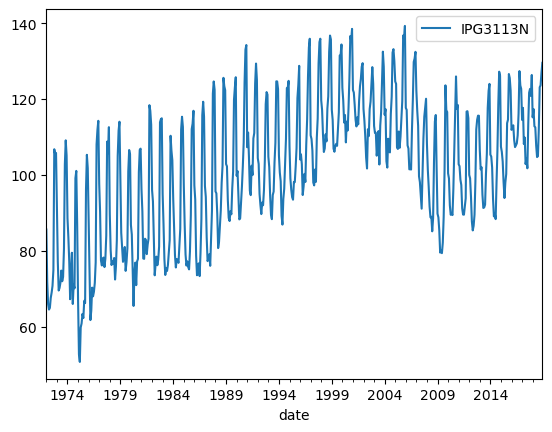

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

candy = pd.read_csv('Downloads/candy_production.csv', index_col = 0, parse_dates =True)
candy.head()

# Plot ant show the time series on axis ax
fig, ax = plt.subplots()
candy.plot(ax=ax)

## Train-test splits
In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

<Axes: xlabel='date'>

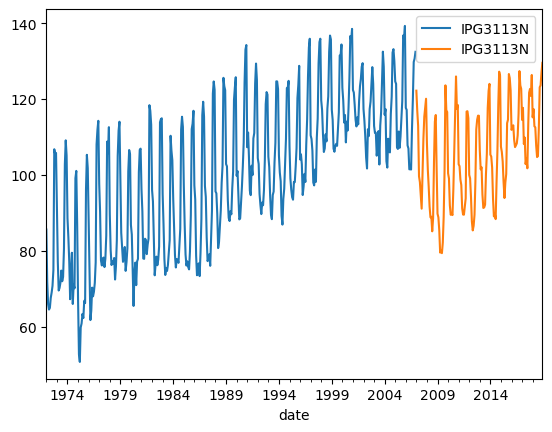

In [2]:
# # Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)

## Is it stationary
Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

## Making time series stationary
The augmented Dicky-Fuller test

Tests for non-stationary

Null hypothesis is time series is non-stationary

## Augmented Dicky-Fuller
In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

In [3]:
earth_quake = pd.read_csv('Downloads/earthquakes.csv')
earth_quake.drop(['Year'], axis=1, inplace = True)
earth_quake

,date,earthquakes_per_year
0,1900-01-01,13.0
1,1901-01-01,14.0
2,1902-01-01,8.0
3,1903-01-01,10.0
4,1904-01-01,16.0
...,...,...
94,1994-01-01,15.0
95,1995-01-01,25.0
96,1996-01-01,22.0
97,1997-01-01,20.0


In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(earth_quake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.1831922511917816
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


Based on the p-value (less than 0.05 means that the data is stationary). Here null-hypothesis is non-stationary. 
The p-value is obtained is less than significance level of 0.05 and the ADF statistic is lower than any of the critical values.

Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact stationary.

## Taking the difference
In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

In [5]:
city = pd.read_csv('Downloads/city.csv', index_col=0, parse_dates=True)
city.head()

C:\Users\Ravi\AppData\Local\Temp\ipykernel_6880\3420294912.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  city = pd.read_csv('Downloads/city.csv', index_col=0, parse_dates=True)


,city_population
date,
1969-09-30,1.000000
1970-03-31,0.960285
1970-09-30,0.957167
1971-03-31,0.946928
1971-09-30,0.987741


ADF Statistic: 5.297698873032672
p-value: 1.0


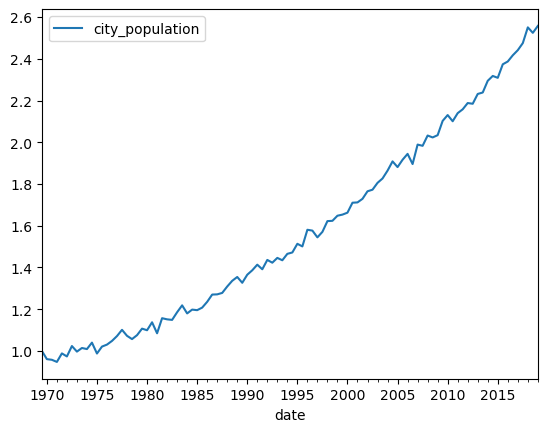

In [6]:
##Run the ADF test on the time series
result = adfuller(city['city_population'])
# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Here null hypothesis is data is non stationary. Since ADF statistic and p-value are higher than 0.05, 
we can not reject null hypothesis. i,e data is non-stationary. We need to do differencing to make the data stationary.

ADF Statistic: -0.814621169634997
p-value: 0.8147894366488997


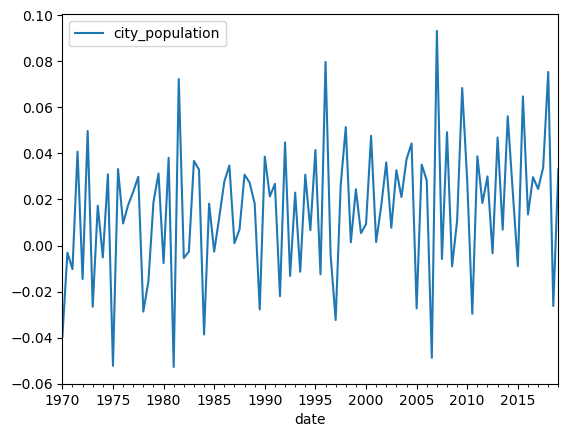

In [7]:
# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result1 = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots();
city_stationary.plot(ax=ax);

# Print the test statistic and the p-value
print('ADF Statistic:', result1[0])
print('p-value:', result1[1])

ADF Statistic: -6.433646027454743
p-value: 1.673449900429456e-08


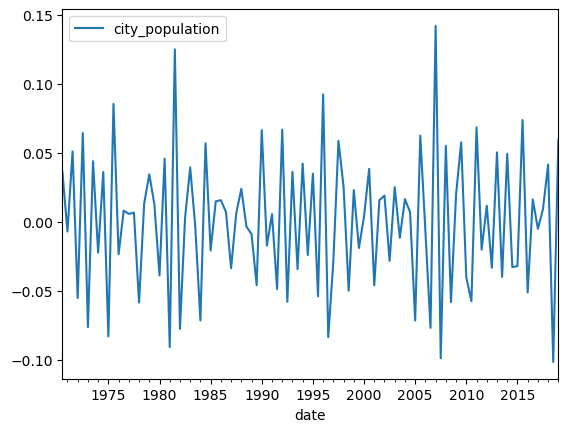

In [8]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result2 = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots();
city_stationary.plot(ax=ax);

# Print the test statistic and the p-value
print('ADF Statistic:', result2[0])
print('p-value:', result2[1])

## Other tranforms
Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:

 
You can calculate the log-return of this DataFrame by substituting:

 → amazon

 → amazon.shift(1)

 → np.log()

In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.

In [9]:
amazon =pd.read_csv('Downloads/amazon_close.csv', index_col=0, parse_dates =True)
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


In [10]:
# Calculate the first difference and drop the nans
amazon_diffs = amazon.diff().dropna()

# Run test and print
result_diff = adfuller(amazon['close'])
print(result_diff)

(-1.3446690965326011, 0.60849663114084, 23, 1235, {'1%': -3.4356560275160835, '5%': -2.8638831211270817, '10%': -2.568017509711682}, 10782.877783880944)


In [11]:
import numpy as np
# Calculate the log-return and drop nans
amazon_log = np.log(amazon.div(amazon.shift(1)))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-34.91574853605965, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


Here F-statistic score and p-value are less than 0.05. Hence we can reject null-hypothesis and the data is stationary.

## Model order
When fitting and working with AR, MA and ARMA models it is very important to understand the model order. You will need to pick the model order when fitting. Picking this correctly will give you a better fitting model which makes better predictions. So in this section you will practice working with model order.

In [12]:
ar_coefs = [1,0.4,-0.1]
ma_coefs = [1,0.2]


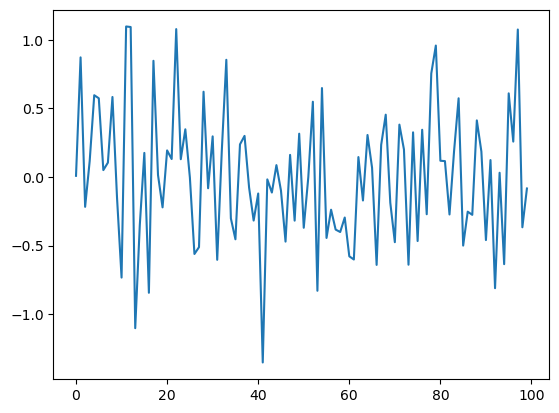

In [13]:
from statsmodels.tsa.arima_process import arma_generate_sample

y = arma_generate_sample(ar_coefs, ma_coefs, nsample = 100, scale = 0.5)
plt.plot(y)

## Generating ARMA data
In this exercise you will generate 100 days worth of AR/MA/ARMA data. Remember that in the real world applications, this data could be changes in Google stock prices, the energy requirements of New York City, or the number of cases of flu.

You can use the arma_generate_sample() function available in your workspace to generate time series using different AR and MA coefficients.

Remember for any model ARMA(p,q):

The list ar_coefs has the form 
.
The list ma_coefs has the form 
,
where 
 are the lag-i AR coefficients and 
 are the lag-j MA coefficients.

In [14]:
np.random.seed(1)

## MA(1) model with MA lag coefficient of -0.7

Text(0.5, 0, '$t$')

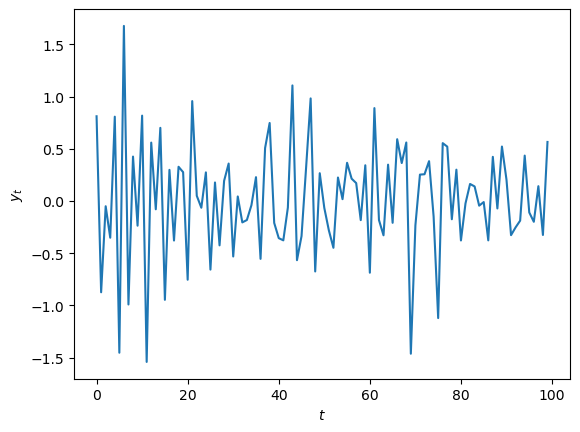

In [15]:
# Set coefficients
ar_coefs = [1]
ma_coefs = [1,-0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale = 0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')

## AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2

Text(0.5, 0, '$t$')

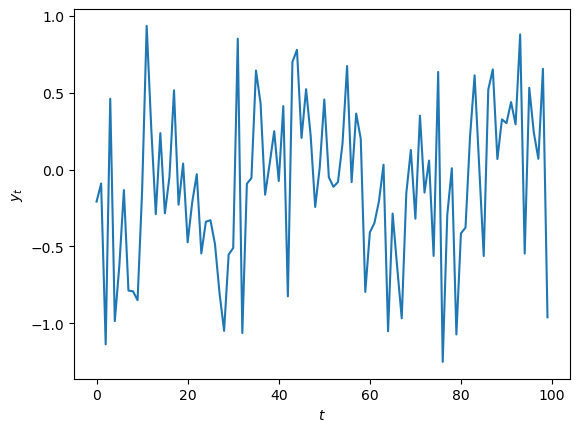

In [16]:
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y);
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')

## ARMA model with AR lag-1 coefficients of 0.2 and MA with lag-1 and lag-2 coefficients of 0.3, 0.4

Text(0.5, 0, '$t$')

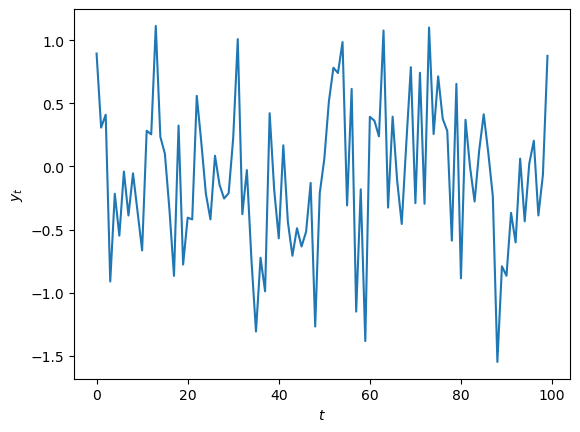

In [17]:
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y);
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')

## Fitting Prelude
Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

In [18]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y, order = (1,0,1))

results = model.fit()

## Fitting time series models
Introduction to ARMAX models
Exogenous ARMA
Use external variables as well as time series
ARMAX = ARMA + linear regression
ARMAX equation
ARMA(1, 1) model:
- ARMAX(1, 1) model:
## Fitting AR and MA models
In this exercise you will fit an AR and an MA model to some data. The data here has been generated using the arma_generate_sample() function we used before.

You know the real AR and MA parameters used to create this data so it is a really good way to gain some confidence with ARMA models and know you are doing it right. In the next exercise you'll move onto some real world data with confidence.

In [19]:
sample = pd.read_csv('Downloads/sample.csv')
sample.head()

,timeseries_1,timeseries_2
0,-0.365474,-0.248275
1,-0.350064,-0.199119
2,-0.376220,-0.307852
3,-0.160168,0.001780
4,-0.081734,-0.128450


## AR(2) model

In [20]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sample['timeseries_1'], order = (2,0,0))

results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           timeseries_1   No. Observations:                  222
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  42.732
Date:                Wed, 20 Sep 2023   AIC                            -77.465
Time:                        10:31:11   BIC                            -63.854
Sample:                             0   HQIC                           -71.969
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.043      0.084      0.933      -0.080       0.087
ar.L1          0.8767      0.073     12.066      0.000       0.734       1.019
ar.L2         -0.1922      0.077     -2.506      0.0

## MA(3) model

In [21]:
model = ARIMA(sample['timeseries_1'], order = (0,0,3))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           timeseries_1   No. Observations:                  222
Model:                 ARIMA(0, 0, 3)   Log Likelihood                  44.803
Date:                Wed, 20 Sep 2023   AIC                            -79.607
Time:                        10:31:11   BIC                            -62.593
Sample:                             0   HQIC                           -72.738
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0056      0.037      0.151      0.880      -0.067       0.078
ma.L1          0.8231      0.071     11.672      0.000       0.685       0.961
ma.L2          0.6273      0.078      8.015      0.0

## Fitting an ARMA model
In this exercise you will fit an ARMA model to the earthquakes dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground.

In [22]:
earth_quake = pd.read_csv('Downloads/earthquakes.csv')
earth_quake.drop(['Year'], axis=1, inplace = True)
earth_quake

,date,earthquakes_per_year
0,1900-01-01,13.0
1,1901-01-01,14.0
2,1902-01-01,8.0
3,1903-01-01,10.0
4,1904-01-01,16.0
...,...,...
94,1994-01-01,15.0
95,1995-01-01,25.0
96,1996-01-01,22.0
97,1997-01-01,20.0


## ARMA(3, 1) model

In [23]:
model = ARIMA(earth_quake['earthquakes_per_year'], order = [3,0,1])
results = model.fit()
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
Date:                  Wed, 20 Sep 2023   AIC                            643.345
Time:                          10:31:11   BIC                            658.916
Sample:                               0   HQIC                           649.645
                                   - 99                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6453      2.233      8.798      0.000      15.269      24.022
ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
ar.L2          0.0251      0.308    

## Forecasting
### Generating one-step-ahead predictions
It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

In [24]:
amazon =pd.read_csv('Downloads/amazon_close.csv', index_col=0, parse_dates =True)
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(amazon.loc['2018-01-01':'2019-02-08'], order = (3,1,3), seasonal_order = (1,0,1,7),
               enforce_invertibility=False,
                enforce_stationarity=False,
                simple_differencing=False, 
                measurement_error=False,
                k_trend=0)

results = model.fit()

print(results.summary())


C:\Users\Ravi\AppData\Local\Temp\ipykernel_6880\581675163.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  model = SARIMAX(amazon.loc['2018-01-01':'2019-02-08'], order = (3,1,3), seasonal_order = (1,0,1,7),
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be i

                                      SARIMAX Results                                      
Dep. Variable:                               close   No. Observations:                  278
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -1331.301
Date:                             Wed, 20 Sep 2023   AIC                           2680.602
Time:                                     10:31:12   BIC                           2712.853
Sample:                                          0   HQIC                          2693.558
                                             - 278                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0938      0.031      3.075      0.002       0.034       0.154
ar.L2          0.0350      

In [26]:
# Generate predictions
one_step_forecast = results.get_prediction(start =-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
conf_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = conf_intervals.loc[:, 'lower close']
upper_limits = conf_intervals.loc[:, 'upper close']

# Print best estimate  predictions
print(mean_forecast.values)

[1442.60232428 1415.10755913 1386.50036727 1348.93015007 1352.99104011
 1413.11160984 1429.83011824 1389.66971461 1437.20178955 1399.21328785
 1457.63859406 1424.83696343 1413.3031071  1395.16946824 1387.29293439
 1363.33412058 1370.22668461 1317.82788324 1293.16431048 1283.69060796
 1301.76792018 1307.03371335 1315.12681511 1273.46032442 1256.21275912
 1242.03476583 1248.81071613 1227.16242463 1220.89351355 1204.1204327 ]


## Plotting one-step-ahead predictions
Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer. 

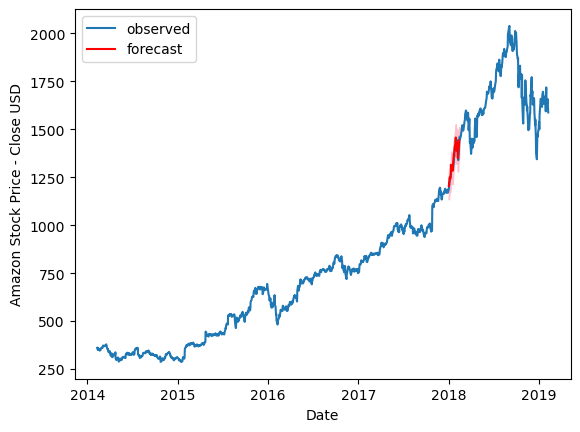

In [27]:
# Plot the amazon data
plt.plot(amazon.index, amazon['close'], label = 'observed')

# Plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label ='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color ='pink')

# Set labels, legends
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()

## Generating dynamic forecasts
Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

In [28]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic = True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower close']
upper_limits = confidence_intervals.loc[:, 'upper close']

# Print bet estimate predictions
print(mean_forecast.values)

[1442.60232428 1442.89498407 1440.8855496  1449.17929573 1450.29401914
 1452.20248101 1445.25780748 1444.17018624 1441.75560533 1448.2514295
 1449.6069417  1452.01115106 1446.35733081 1444.50579854 1441.75596817
 1446.76069541 1448.76190981 1451.72495983 1447.48427927 1445.30668984
 1442.24728263 1445.85868266 1448.08666228 1451.28452115 1448.29909899
 1446.04970409 1442.77595853 1445.14743349 1447.32999688 1450.66057359]


## Plotting dynamic forecasts
Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

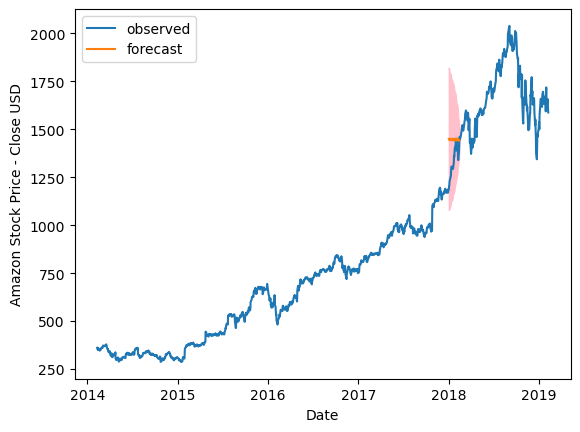

In [29]:
# Plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed');

# Plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, label='forecast');

# Shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink');

# set labels, legends
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()

## Intro to ARIMA models
The ARIMA model

Take the difference

Fit ARMA model

Integrate forecast

ARIMA - Autoregressive Integrated Moving Average

## Differencing and fitting ARMA
In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

In [30]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2, 2) model
arma = SARIMAX(amazon_diff, order = (2,0,2))

results = arma.fit()

print(results.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5534.654
Date:                Wed, 20 Sep 2023   AIC                          11079.308
Time:                        10:31:15   BIC                          11104.995
Sample:                             0   HQIC                         11088.962
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1773      0.103     -1.723      0.085      -0.379       0.024
ar.L2          0.7722      0.105      7.352      0.000       0.566       0.978
ma.L1          0.1639      0.098      1.669      0.0

## Unrolling ARMA forecast
Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

In [31]:
# Make arma forecast of next 10 differences
arma_diff_forecast = results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

print(arma_value_forecast)

1258    359.999388
1259    360.587838
1260    359.811248
1261    360.403300
1262    359.698675
1263    360.280753
1264    359.633468
1265    360.197680
1266    359.597839
1267    360.139846
Name: predicted_mean, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## Fitting an ARIMA model
In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets statsmodels do the hard work for you.

You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an ARIMA model.

In [32]:
# Create ARIMA(2, 1, 2) model
arima = SARIMAX(amazon, order = (2,1,2))

arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_forecast = arima_results.get_forecast(steps=10).predicted_mean

print(arima_forecast)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1259    360.000772
1260    360.587970
1261    359.812551
1262    360.403539
1263    359.699896
1264    360.281083
1265    359.634608
1266    360.198089
1267    359.598905
1268    360.140325
Name: predicted_mean, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


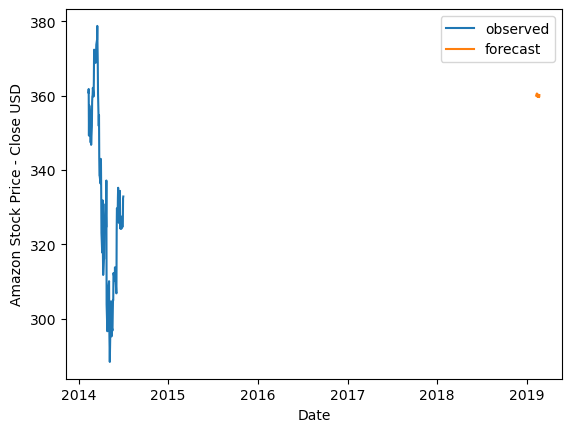

In [33]:
# Plot the amazon data
plt.plot(amazon.index[-100:], amazon.iloc[-100:]['close'], label='observed')

# Plot your mean forecast
rng = pd.date_range(start='2019-02-08', end='2019-02-21', freq='b')
plt.plot(rng, arima_forecast.values, label='forecast')

# Shade the area between your confidence limits
# plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()

## Intro to ACF and PACF
ACF : AutoCorrelation Function \
: Correlation between time series and the same time series offset by n-step - lag-1 autocorrelation -> 
 - lag-2 autocorrelation -> 
 - 
 - lag-n autocorrelation -> 
 - If ACF values are small and lie inside the blue shaded region, then they are not statistically significant.

PACF : Partial AutoCorrelation Function
: Correlation between time series and lagged version of itself after we subtract the effect of correlation at smaller lags.
Using ACF and PACF to choose model order
AR(p)	MA(q)	ARMA(p, q)
ACF	Tails off	Cuts off after lag q	Tails off
PACF	Cuts off after lag p	Tails off	Tails off
## AR or MA
In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our prediction

In [34]:
sample2 = pd.read_csv('Downloads/sample2.csv', index_col =0, parse_dates = True)
sample2

C:\Users\Ravi\AppData\Local\Temp\ipykernel_6880\2143002418.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sample2 = pd.read_csv('Downloads/sample2.csv', index_col =0, parse_dates = True)


,y
2013-01-01,1.624345
2013-02-01,-0.936625
2013-03-01,0.081483
2013-04-01,-0.663558
2013-05-01,0.738023
...,...
2013-07-27,-1.488203
2013-07-28,-1.964427
2013-07-29,1.417519
2013-07-30,-1.320617


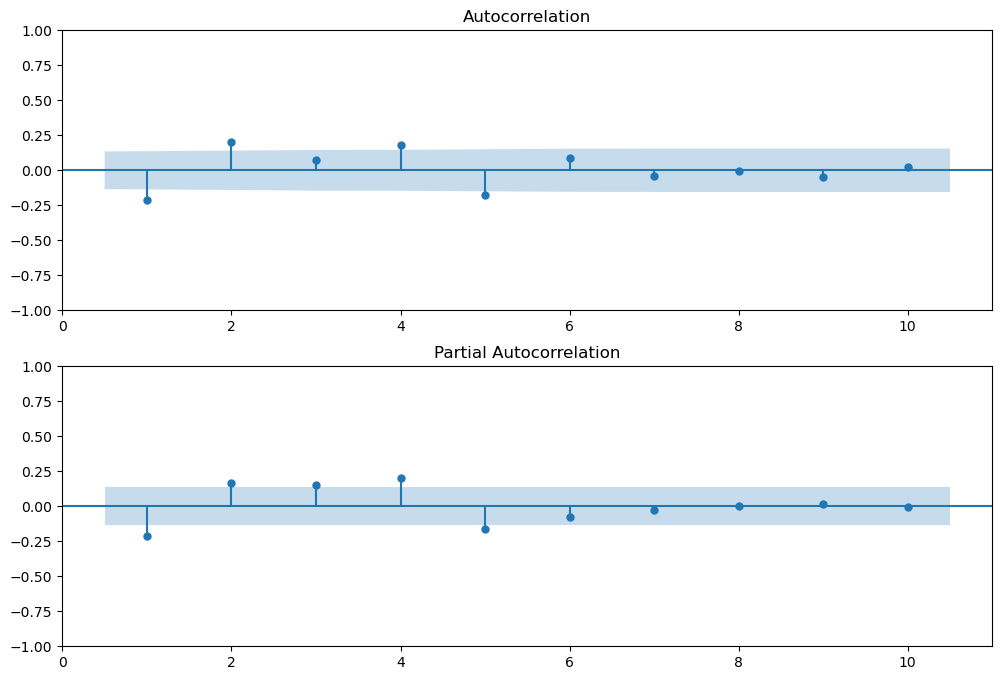

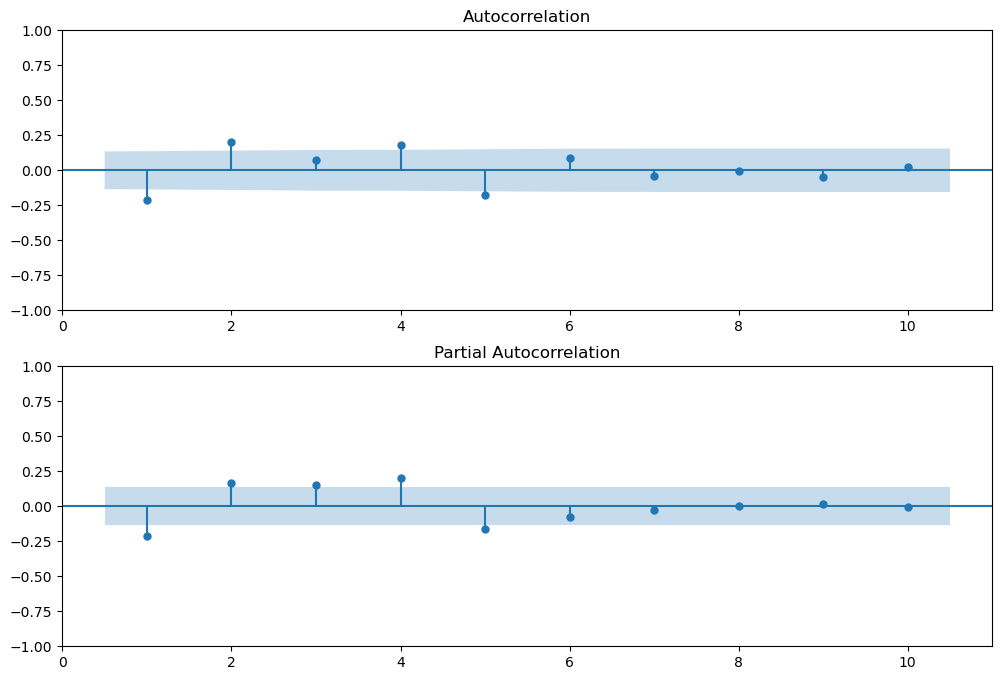

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (12,8))

plot_acf(sample2, lags =10, zero=False, ax=ax1)

plot_pacf(sample2, lags=10, zero =False, ax=ax2, method= 'ywm')

In [36]:
earth_quake = pd.read_csv('Downloads/earthquakes.csv', index_col = 0, parse_dates=True)
earth_quake.drop(['Year'], axis=1, inplace = True)
earth_quake

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0
...,...
1994-01-01,15.0
1995-01-01,25.0
1996-01-01,22.0


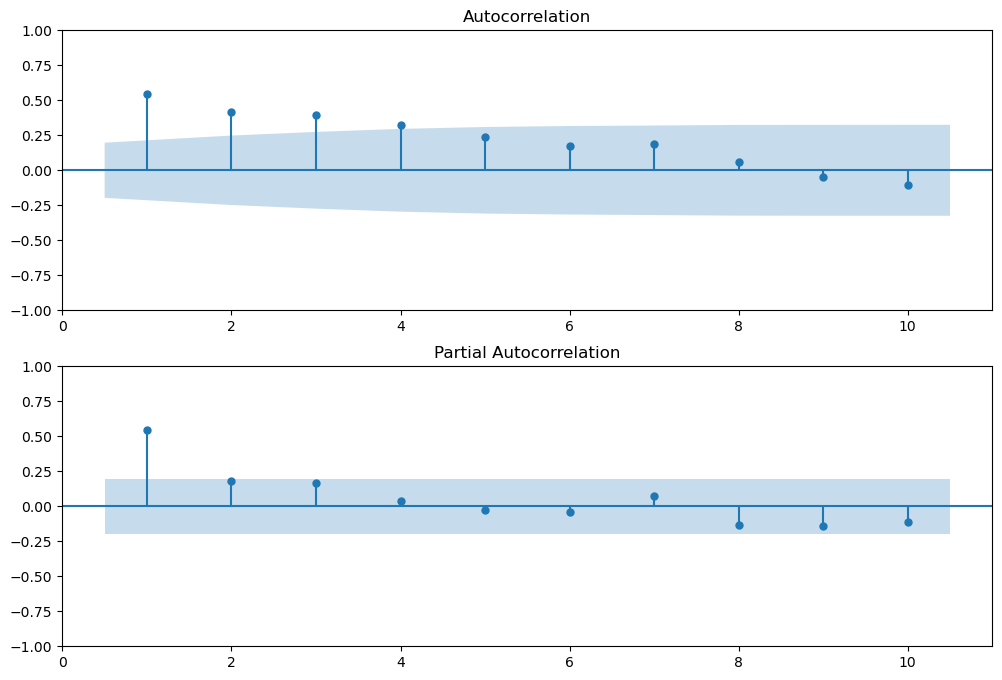

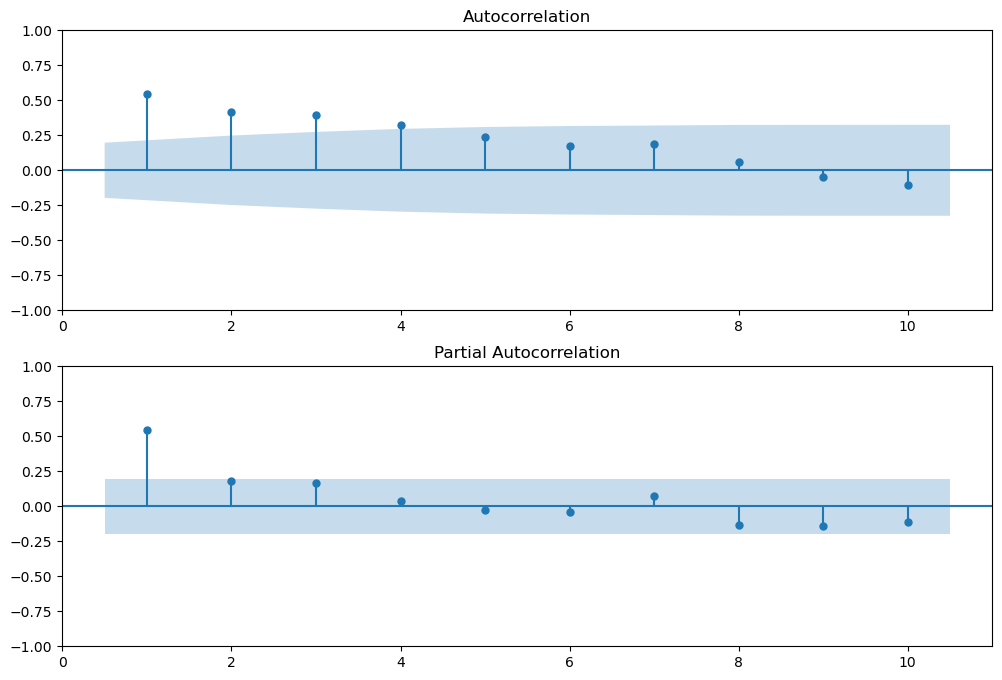

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (12,8))

plot_acf(earth_quake, lags =10, zero=False, ax=ax1)

plot_pacf(earth_quake, lags=10, zero =False, ax=ax2, method= 'ywm')

 Based on the ACF and PACF plots, This is AR(1) model.

## Intro to AIC and BIC
AIC (Akaike Information Criterion)

  -Lower AIC indicates a better model

  -AIC likes to choose simple models with lower order

BIC (Bayesian Information Criterion)

  -Very similar to AIC

  -Lower BIC indicates a better model

  -BIC likes to choose simple models with lower order

AIC vs BIC

  -The difference between two metrics is how much they penalize model complexity

  -BIC favors simpler models than AIC

  -AIC is better at choosing predictive models

  -BIC is better at choosing good explanatory model

## Searching over model order

In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

C:\Users\Ravi\AppData\Local\Temp\ipykernel_6880\115519478.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sample2 = pd.read_csv('Downloads/sample2.csv', index_col =0, parse_dates = True)


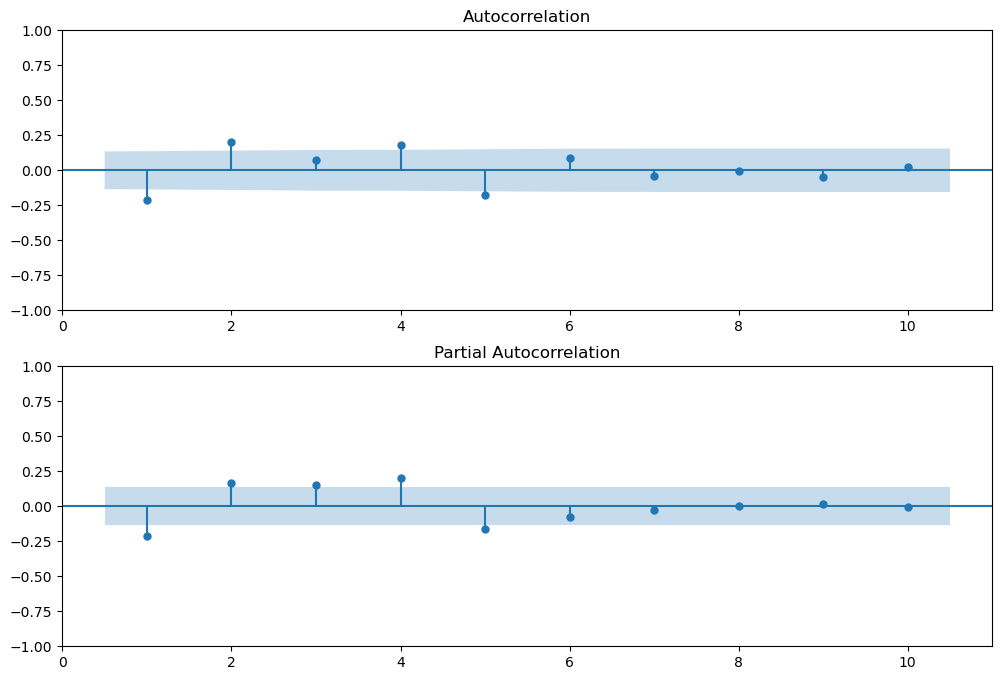

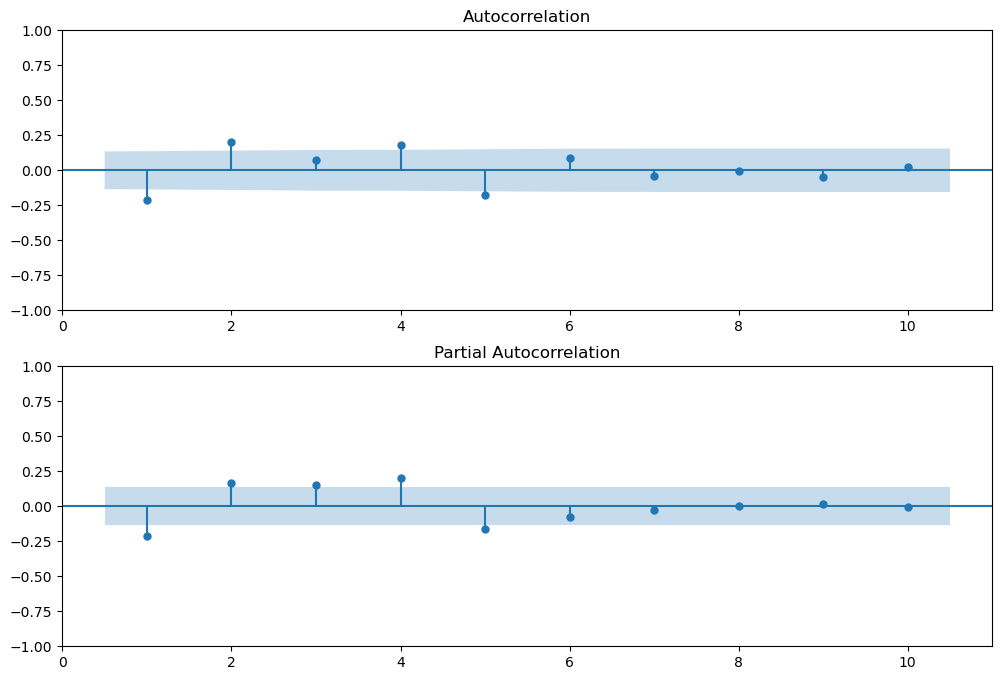

In [38]:
sample2 = pd.read_csv('Downloads/sample2.csv', index_col =0, parse_dates = True)
sample2

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (12,8))

plot_acf(sample2, lags =10, zero=False, ax=ax1)

plot_pacf(sample2, lags=10, zero =False, ax=ax2, method= 'ywm')

In [39]:
# Create empty list to store search results
order_aic_bic = []

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
        # Create and fit ARMA(p, q) model
        model = SARIMAX(sample2, order = (p,0,q))
        results = model.fit()
# Append order and results tuple
        order_aic_bic.append((p,q, results.aic, results.bic))
        

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

## Choosing order with AIC and BIC
Now that you have performed a search over many model orders, you will evaluate your results to find the best model order.

In [40]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, columns = ['p','q','AIC','BIC'])

# Print order_df in order of increasing AI
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
8  2  2  575.220500  592.003432
5  1  2  577.461665  590.888010
7  2  1  584.820420  598.246765
2  0  2  585.104649  595.174408
6  2  0  589.916000  599.985759
4  1  1  592.111297  602.181056
3  1  0  595.183100  601.896272
1  0  1  597.755457  604.468629
0  0  0  601.562748  604.919335
   p  q         AIC         BIC
5  1  2  577.461665  590.888010
8  2  2  575.220500  592.003432
2  0  2  585.104649  595.174408
7  2  1  584.820420  598.246765
6  2  0  589.916000  599.985759
3  1  0  595.183100  601.896272
4  1  1  592.111297  602.181056
1  0  1  597.755457  604.468629
0  0  0  601.562748  604.919335


Based on this result, ARMA(2,2) model is the best fit

## AIC and BIC vs ACF and PACF
In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results.

In [41]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARMA(p, q) model
            model = SARIMAX(earth_quake, order= (p,0,q))
            results = model.fit()
        
            # Print order and results
            print(p,q,results.aic, results.bic)
            
        except:
            print(p,q,None, None)
        
        

0 0 888.4297722924081 891.0248921425426
0 1 799.6741727812044 804.8644124814737


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-

0 2 761.0674787503889 768.8528383007927
1 0 666.6455255041617 671.8357652044309
1 1 647.132299967382 654.9176595177858


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-

1 2 648.7385664620734 659.1190458626118
2 0 656.0283744146395 663.8137339650433


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

2 1 648.8428399959137 659.223319396452


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


2 2 648.85064434314 661.8262435938129


## Model diagnostics
### Introduction to model diagnostics

How good is the final model?

Residual with mean absolute error

Normal Q-Q plot

Correlogram

Summary statistics

### Mean absolute error
Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

4.755625669976196


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='date'>

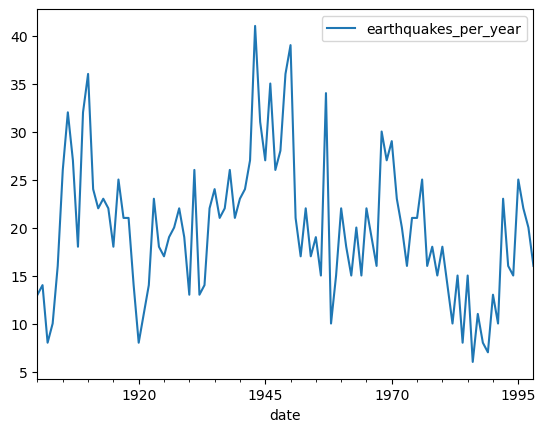

In [42]:
# Fit model
model = SARIMAX(earth_quake, order =(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

print(mae)

# Make plot of time series for comparison
earth_quake.plot()

## Diagnostic summary statistics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

Here is a reminder of the tests in the model summary:

Test	               Null hypothesis	                 P-value

Ljung-Box	There are no correlations in the residual	 Prob(Q)

Jarque-Bera	The residuals are normally distributed	     Prob(JB)

In [45]:
# Create and fit model
model1 = SARIMAX(sample2, order = (3,0,1))
results1 = model1.fit()

print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -287.380
Date:                Wed, 20 Sep 2023   AIC                            584.760
Time:                        11:11:25   BIC                            601.543
Sample:                             0   HQIC                           591.543
                                - 212                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1394      0.301      0.463      0.644      -0.451       0.730
ar.L2          0.2712      0.078      3.470      0.001       0.118       0.424
ar.L3          0.1322      0.103      1.285      0.1

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
# Create and fit model
model2 = SARIMAX(sample2, order = (2,0,0))
results2 = model2.fit()

print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -291.958
Date:                Wed, 20 Sep 2023   AIC                            589.916
Time:                        11:12:31   BIC                            599.986
Sample:                             0   HQIC                           593.986
                                - 212                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1612      0.059     -2.712      0.007      -0.278      -0.045
ar.L2          0.1856      0.064      2.896      0.004       0.060       0.311
sigma2         0.9194      0.094      9.794      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Plot diagnostics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use 4 common plots to decide whether a model is a good fit to some data.

Here is a reminder of what you would like to see in each of the plots for a model that fits well:

Test	Good fit
Standardized residual	There are no obvious patterns in the residuals

Histogram plus kde estimate	The KDE curve should be very similar to the normal distribution

Normal Q-Q	Most of the data points should lie on the straight line

Correlogram	95% of correlations for lag greater than one should not be significant

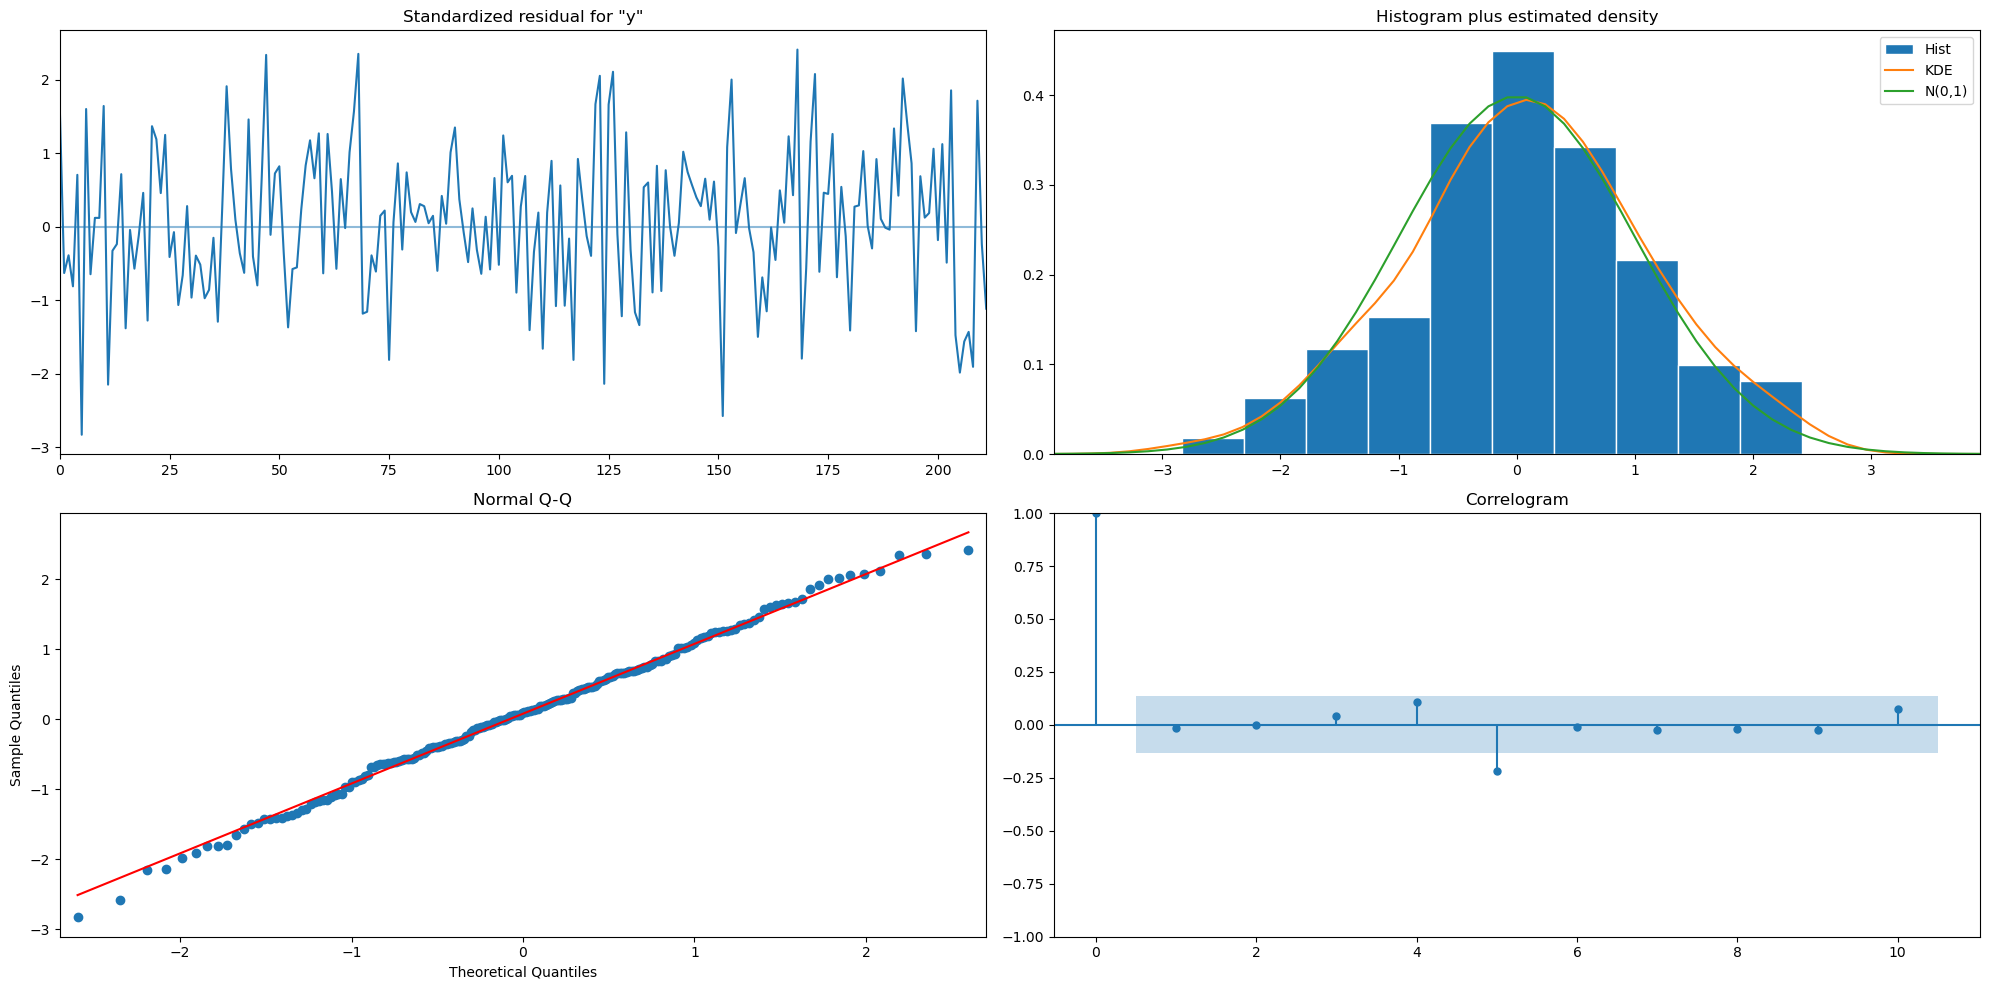

In [48]:
# Create the 4 diagostics plots
results1.plot_diagnostics(figsize=(20,10))
plt.tight_layout()

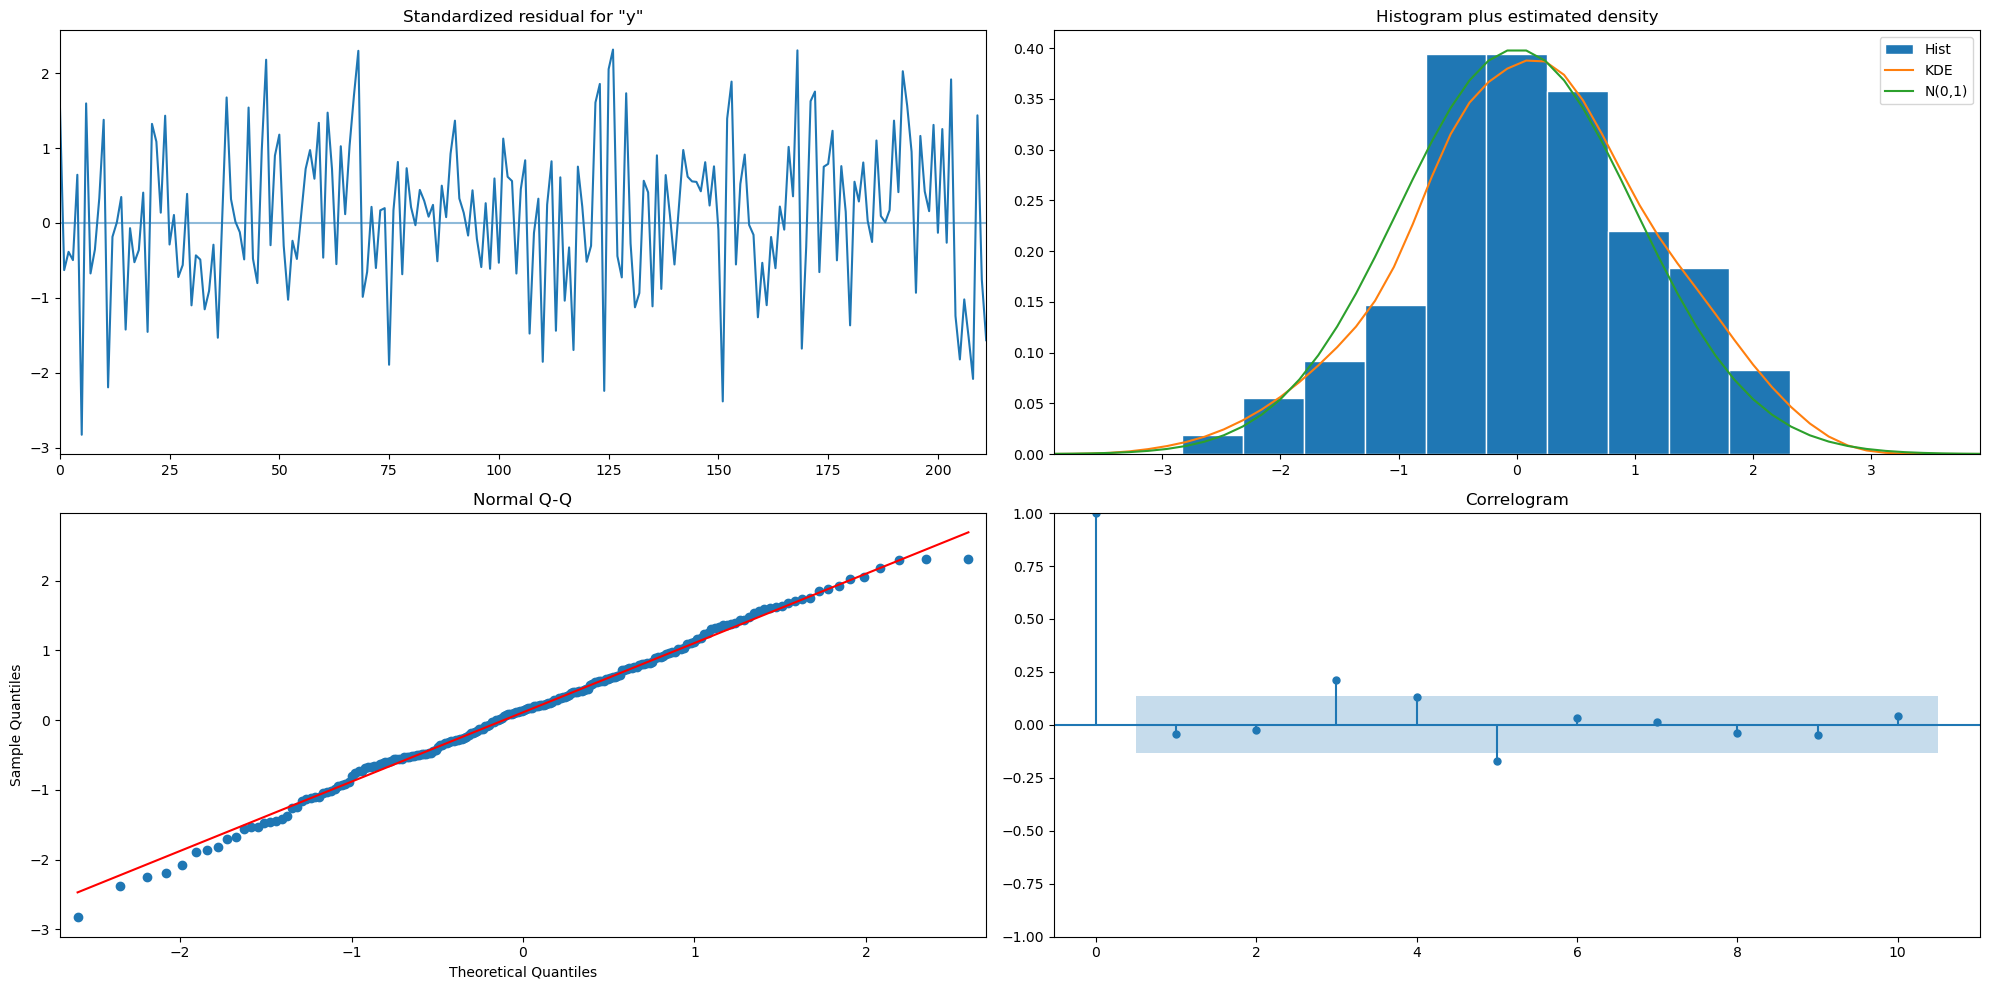

In [49]:
# Create the 4 diagostics plots
results2.plot_diagnostics(figsize=(20,10))
plt.tight_layout()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


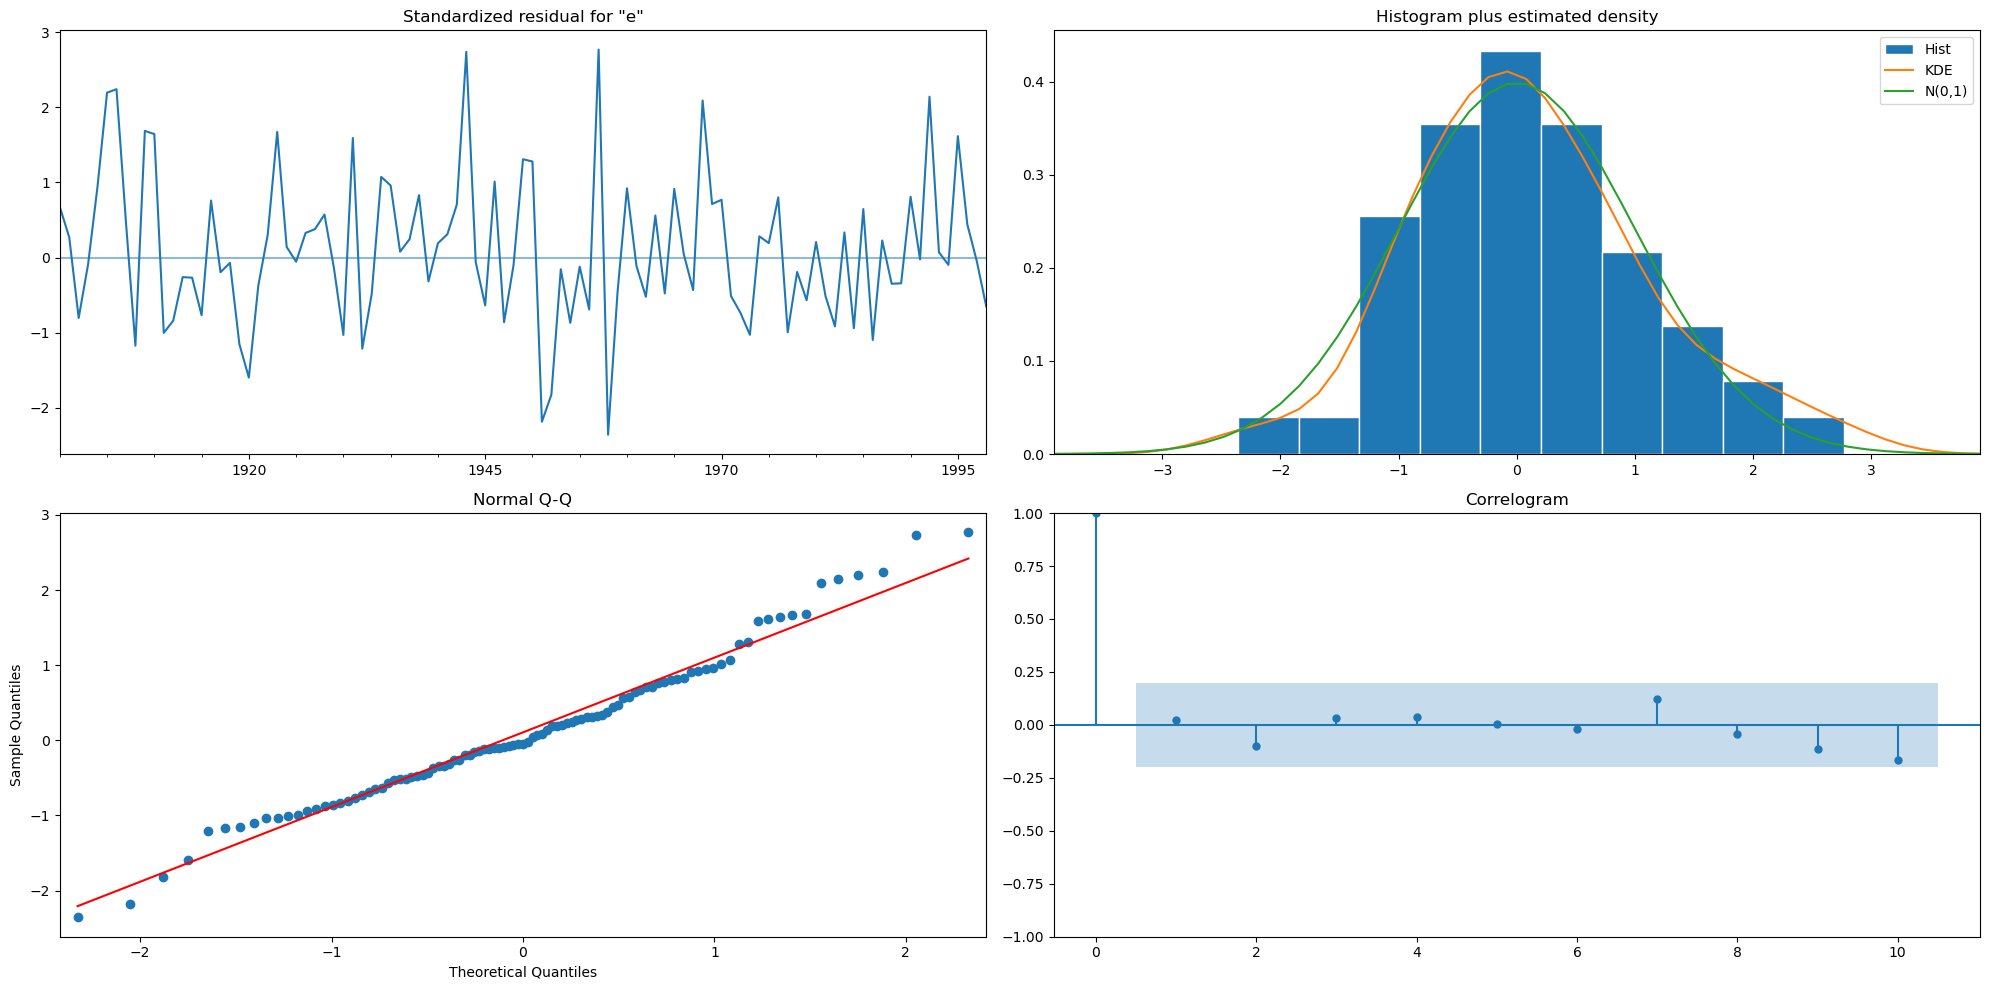

In [50]:
# Create and fit model
model3 = SARIMAX(sample2, order=(1, 1, 1))
results3 =model.fit()

# Create the 4 diagostics plots
results3.plot_diagnostics(figsize=(20, 10));
plt.tight_layout();

## Box-Jenkins method

From raw data -> production model

- identification

- estimation

- model diagnostics

Identification
 - Is the time series stationary?
 - What differencing will make it stationary?
 - What transforms will make it stationary?
 - What values of p and q are most promising?

Estimation
 - Use the data to train the model coefficient
 - Done for us using model.fit()
 - Choose between models using AIC and BIC

Model Diagnostics
 - Are the residuals uncorrelated
 - Are residuals normally distributed

## Identification

In the following exercises you will apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts.

You will be using a new time series. This is the personal savings as % of disposable income 1955-1979 in the US.

The first step of the Box-Jenkins methodology is Identification. In this exercise you will use the tools at your disposal to test whether this new time series is stationary.

In [63]:
savings = pd.read_csv('Downloads/savings.csv', index_col =0, parse_dates = True)

savings.head()

,savings
date,
1955-01-01,4.9
1955-01-04,5.2
1955-01-07,5.7
1955-01-10,5.7
1956-01-01,6.2


-3.18589909624214
0.020815541644114133


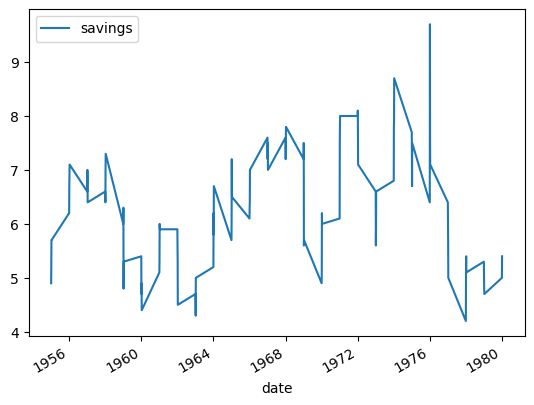

In [66]:
from statsmodels.tsa.stattools import adfuller

# Plot time series
savings.plot()

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistics
print(result[0])

# Print p-value
print(result[1])

## Identification II
You learned that the savings time series is stationary without differencing. Now that you have this information you can try and identify what order of model will be the best fit.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


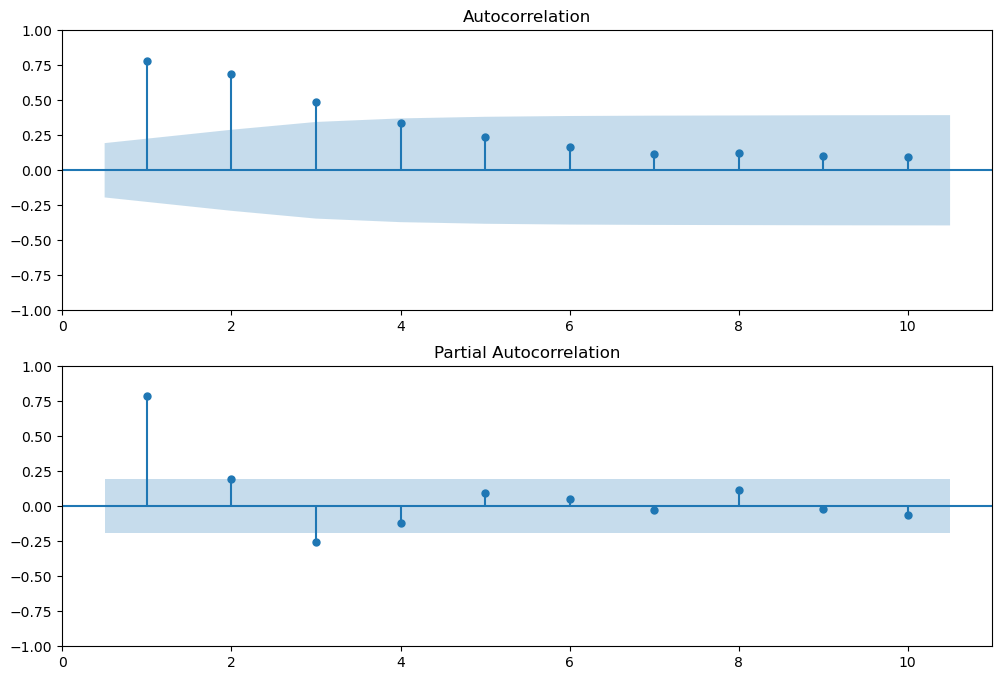

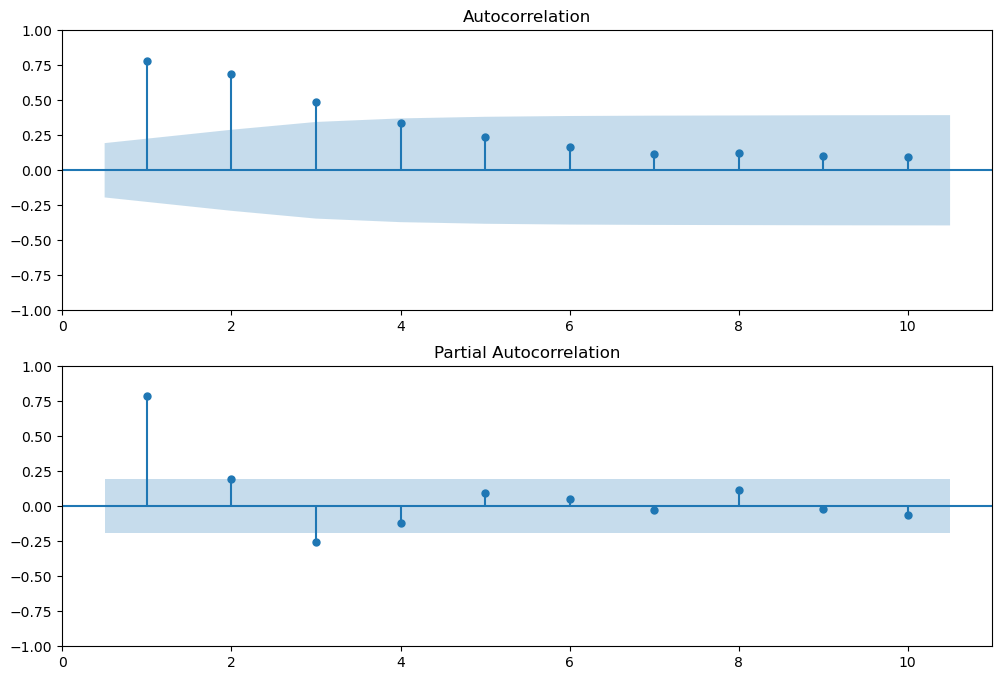

In [67]:
# Create figure

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))

# Plot the ACF of savings on ax1
plot_acf(savings, lags =10, zero = False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags =10, zero = False, ax=ax2)

The ACF and the PACF are a little inconclusive for this ones. The ACF tails off nicely but the PACF might be tailing off or it might be dropping off. So it could be an ARMA(p,q) model or a AR(p) model.

## Estimation
In the last exercise, the ACF and PACF were a little inconclusive. The results suggest your data could be an ARMA(p,q) model or could be an imperfect AR(3) model. In this exercise you will search over models over some model orders to find the best one according to AIC.

In [69]:
# Loop over p values from 0-3
for p in range(4):
    # Loop over q values from 0-3
    for q in range(4):
        try:
            # Create and fit ARMA(p, q) model
            model = SARIMAX(savings, order = (p,0,q), trend ='c')
            results = model.fit()
            # Print p, q, AIC, BIC
            print(p, q, results.aic, results.bic)
            
        except:
            print(p,q,None, None)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

0 0 313.6028657326894 318.85281135925794
0 1 267.0697097688693 274.9446282087221
0 2 232.16782676455594 242.66771801769303
0 3 217.59720511188755 230.7220691783089
1 0 216.20348062499767 224.0783990648505


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

1 1 215.70038988616562 226.20028113930272
1 2 207.65298608432371 220.77785015074505


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

1 3 209.574986916012 225.32482379571763
2 0 213.97232327542525 224.47221452856235


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

2 1 213.4303567906089 226.55522085703024


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2 2 209.57903436792196 225.3288712476276


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2 3 211.57503208985474 229.94984178284463
3 0 209.54493107911802 222.66979514553935


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

3 1 210.8214763494333 226.57131322913892


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


3 2 211.45759881812606 229.83240851111594


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


3 3 213.5438999338278 234.54368244010195


You didn't store and sort your results this time. But the AIC and BIC both picked the ARMA(1,2) model as the best and the AR(3) model as the second best.



## Diagnostics
You have arrived at the model diagnostic stage. So far you have found that the initial time series was stationary, but may have one outlying point. You identified promising model orders using the ACF and PACF and confirmed these insights by training a lot of models and using the AIC and BIC.

You found that the ARMA(1,2) model was the best fit to our data and now you want to check over the predictions it makes before you would move it into production.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Wed, 20 Sep 2023   AIC                            207.653
Time:                        11:49:42   BIC                            220.778
Sample:                             0   HQIC                           212.968
                                - 102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.7

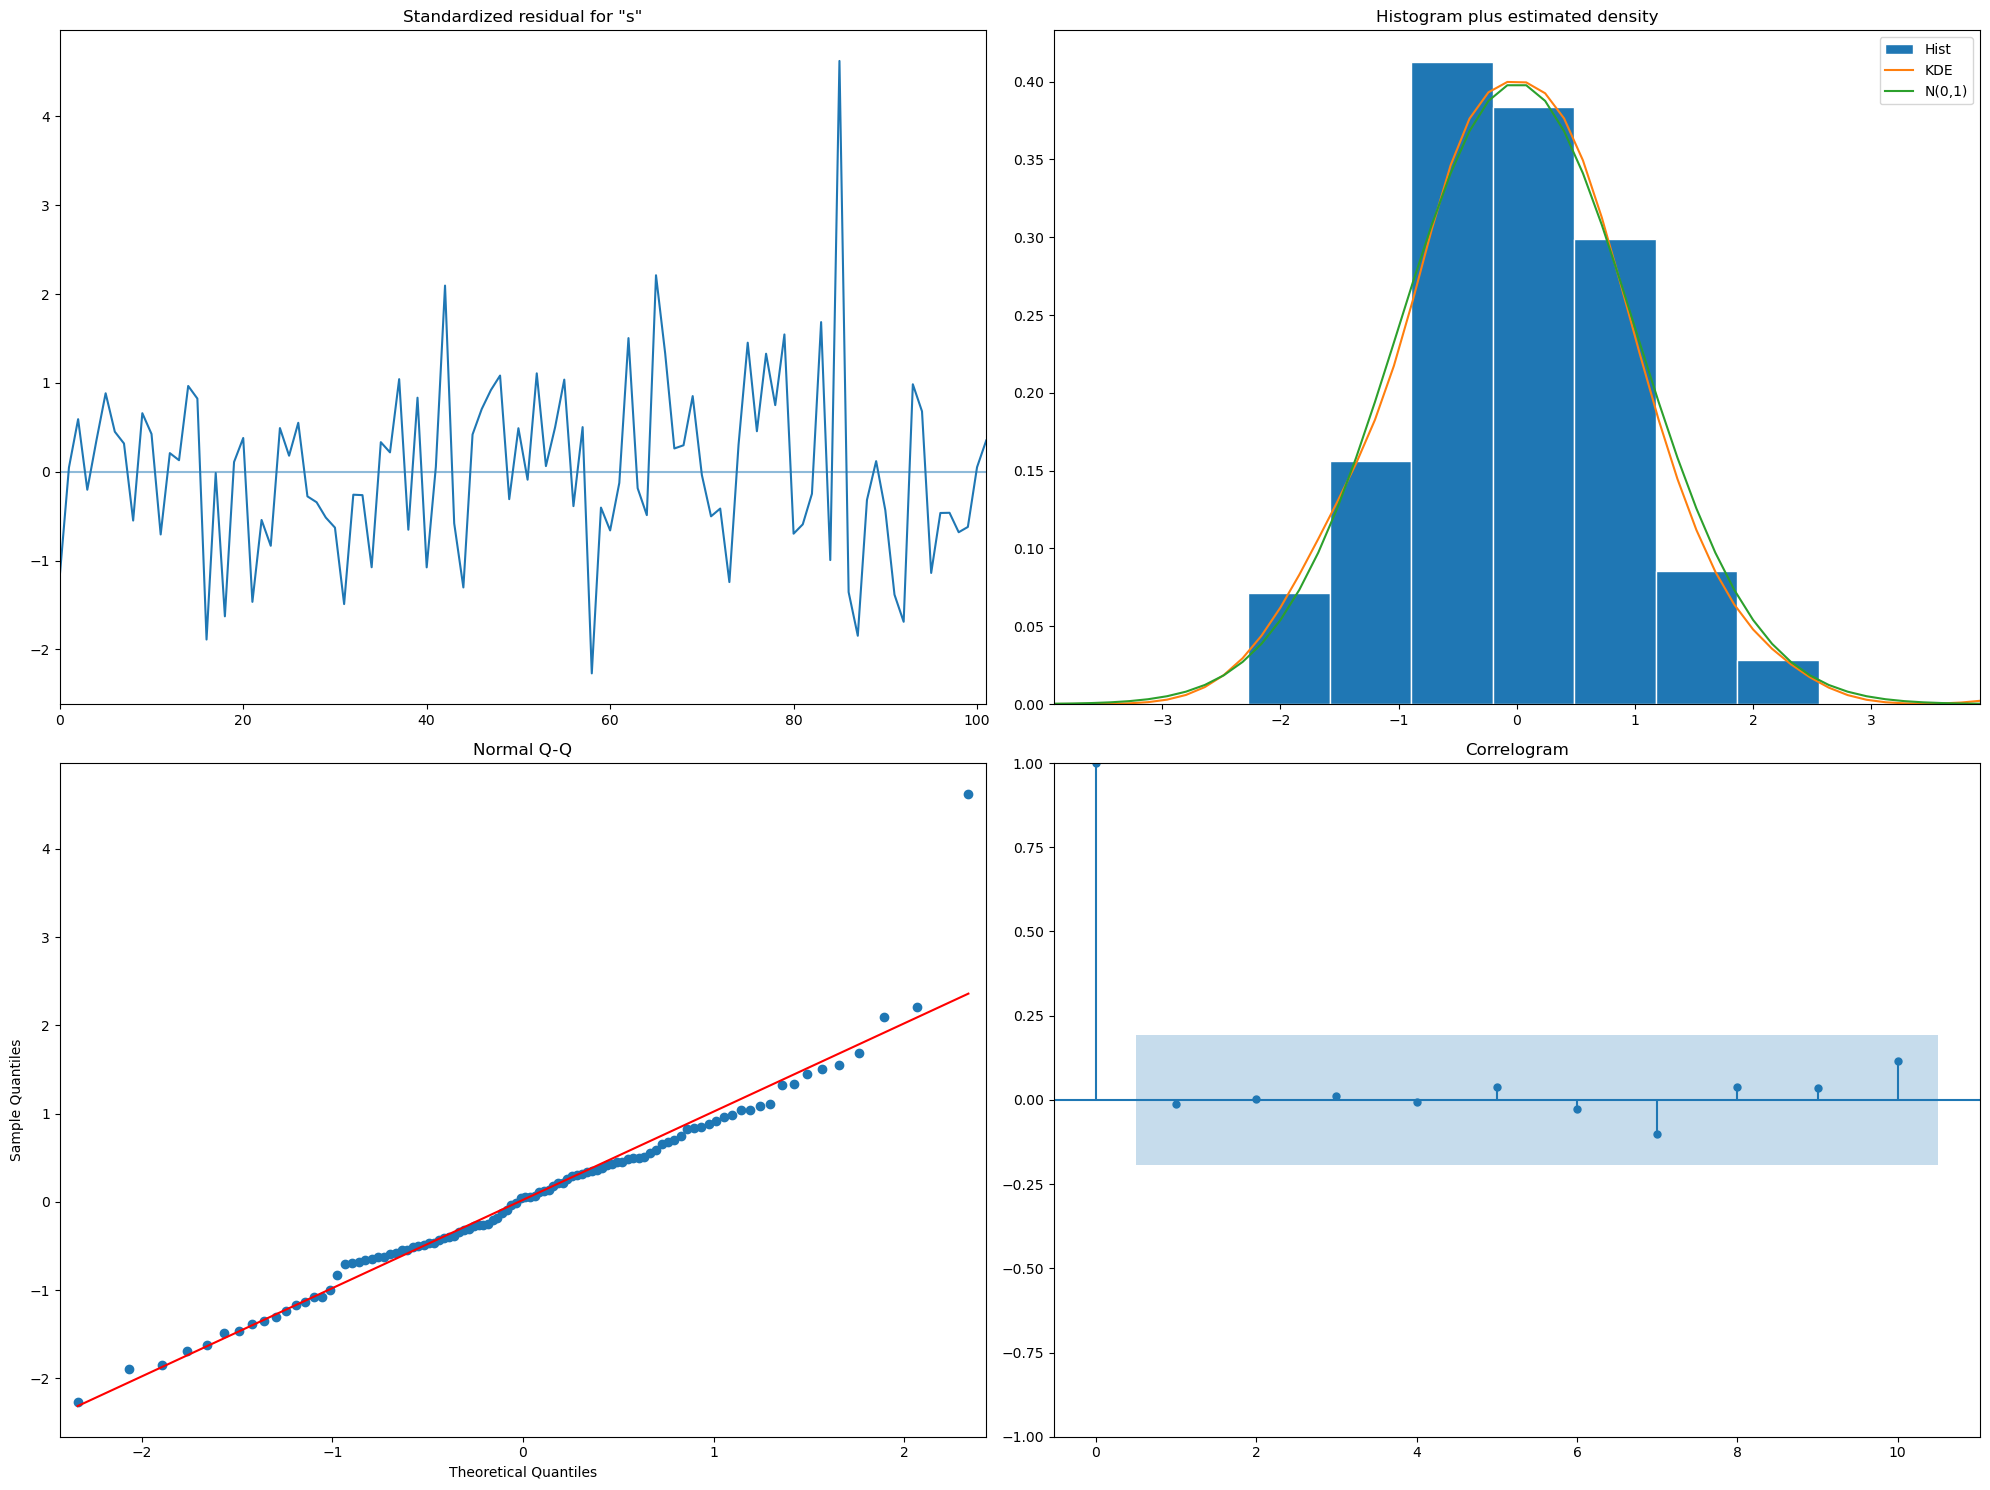

In [70]:
# Create and fit model
model = SARIMAX(savings, order = (1,0,2), trend = 'c')
results = model.fit()

# Create the 4 diagnostics plots
results.plot_diagnostics(figsize=(20,15))

plt.tight_layout()

# Print summary
print(results.summary())


The JB p-value is zero, which means you should reject the null hypothesis that the residuals are normally distributed. However, the histogram and Q-Q plots show that the residuals look normal. This time the JB value was thrown off by the one outlying point in the time series. In this case, you could go back and apply some transformation to remove this outlier or you probably just continue to the production stage.

# Seasonal time series

Seasonal data
 - Has predictable and repeated patterns
 - Repeats after any amount of time

Seasonal decomposition
 - time series = trend + seasonal + redisdual

## Seasonal decompose
You can think of a time series as being composed of trend, seasonal and residual components. This can be a good way to think about the data when you go about modeling it. If you know the period of the time series you can decompose it into these components.

In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case.

In [71]:
milk = pd.read_csv('Downloads/milk_production.csv', index_col = 0, parse_dates = True)
milk = milk.asfreq('MS')
milk

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


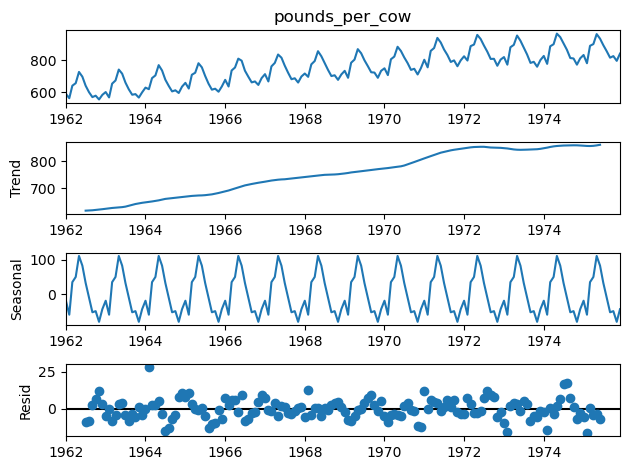

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk['pounds_per_cow'], period =12)

decomp.plot()
plt.tight_layout()

## Seasonal ACF and PACF
Below is a time series showing the estimated number of water consumers in London. By eye you can't see any obvious seasonal pattern, however your eyes aren't the best tools you have

In [74]:
water = pd.read_csv('Downloads/water.csv', index_col = 0, parse_dates =True)

water.head()

,water_consumers
date,
1983-01-01,24963
1983-01-02,27380
1983-01-03,32588
1983-01-04,25511
1983-01-05,32313


<Axes: xlabel='date'>

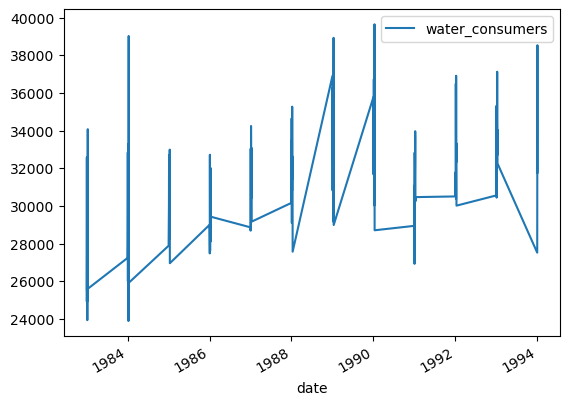

In [75]:
water.plot()

In this exercise you will use the ACF and PACF to test this data for seasonality. You can see from the plot above that the time series isn't stationary, so you should probably detrend it. You will detrend it by subtracting the moving average. Remember that you could use a window size of any value bigger than the likely period.

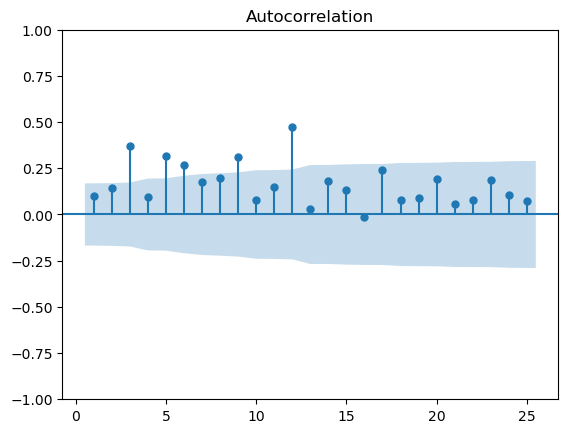

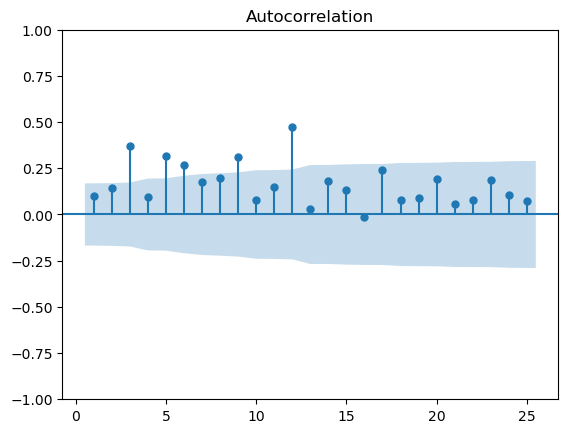

In [76]:
from statsmodels.graphics.tsaplots import plot_acf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags =25, zero=False, ax=ax1)

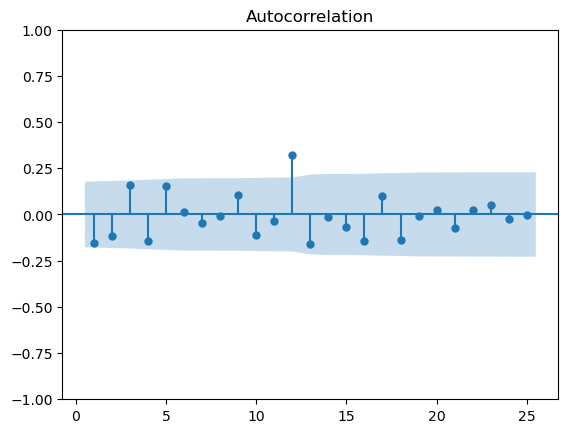

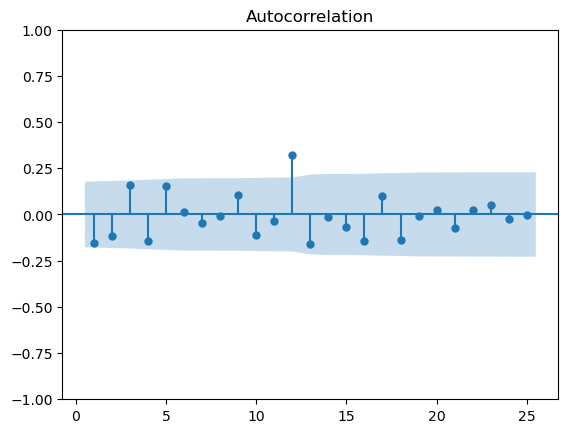

In [79]:
# Subtract the rolling mean
water2 = water-water.rolling(15).mean()

# Drop the NaN values
water2 = water2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

plot_acf(water2['water_consumers'], lags =25, zero =False, ax=ax1)

Based on this figure, 12 time steps is the time period of the seasonal component.

## SARIMA models
Seasonal ARIMA = SARIMA
- Non-seasonal orders
    - p: autoregressive order
    - d: differencing order
    - q: moving average order
- Seasonal orders
    - P: seasonal autoregressive order
    - D: seasonal differencing order
    - Q: seasonal moving average order
    - S: Number of time steps per cycle

### The SARIMA model
ARIMA(2, 0, 1) model:
- $\text{SARIMA}(0,0,0)(2, 0, 1)_7$ model:

Seasonal differencing

Subtract the time series value of one season ago


## Fitting SARIMA models
Fitting SARIMA models is the beginning of the end of this journey into time series modeling.

It is important that you get to know your way around the SARIMA model orders and so that's what you will focus on here.

In this exercise, you will practice fitting different SARIMA models to a set of time series.

In [107]:
df1 = pd.read_csv('Downloads/df1.csv', index_col = 0, parse_dates = True)
df2 = pd.read_csv('Downloads/df2.csv', index_col = 0, parse_dates = True)
df3 = pd.read_csv('Downloads/df3.csv', index_col = 0, parse_dates = True)

C:\Users\Ravi\AppData\Local\Temp\ipykernel_6880\1607379612.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1 = pd.read_csv('Downloads/df1.csv', index_col = 0, parse_dates = True)
C:\Users\Ravi\AppData\Local\Temp\ipykernel_6880\1607379612.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2 = pd.read_csv('Downloads/df2.csv', index_col = 0, parse_dates = True)
C:\Users\Ravi\AppData\Local\Temp\ipykernel_6880\1607379612.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df3 = pd.read_csv('Downloads/df3.csv', index_col = 0, parse_dates = True)


In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMAX model
model = SARIMAX(df1, order = (1,0,0), seasonal_order = (1,1,0,7))

results = model.fit()

print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 Y   No. Observations:                  337
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -722.414
Date:                           Wed, 20 Sep 2023   AIC                           1450.829
Time:                                   14:19:20   BIC                           1462.226
Sample:                               01-01-2013   HQIC                          1455.375
                                    - 12-03-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2770      0.110      2.520      0.012       0.062       0.492
ar.S.L7       -0.3623      0.232     -1.563

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMAX model
model = SARIMAX(df2, order = (2,1,1), seasonal_order = (1,0,0,4))

results = model.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  337
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -701.754
Date:                            Wed, 20 Sep 2023   AIC                           1413.509
Time:                                    14:22:00   BIC                           1432.594
Sample:                                01-01-2013   HQIC                          1421.117
                                     - 12-03-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1899      0.089     -2.132      0.033      -0.364      -0.015
ar.L2          0.4261      0.165   

In [85]:
# Create a SARIMAX model
model = SARIMAX(df3, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                                    Y   No. Observations:                  337
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -981.955
Date:                              Wed, 20 Sep 2023   AIC                           1969.910
Time:                                      14:23:14   BIC                           1981.253
Sample:                                  01-01-2013   HQIC                          1974.438
                                       - 12-03-2013                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.067      4.756      0.000       0.187       0.449
ma.S.L12      -0.99

## Choosing SARIMA order
In this exercise you will find the appropriate model order for a new set of time series. This is monthly series of the number of employed persons in Australia (in thousands). The seasonal period of this time series is 12 months.

You will create non-seasonal and seasonal ACF and PACF plots and use the table below to choose the appropriate model orders.

AR(p)	MA(q)	ARMA(p, q)

ACF	Tails off	Cuts off after lag q	Tails off

PACF	Cuts off after lag p	Tails off	Tails off

In [87]:
aus_empl = pd.read_csv('Downloads/aus_employment.csv', index_col=0, parse_dates = True)
aus_empl.head()

,people_employed
date,
1978-01-01,5985.7
1978-01-02,6040.6
1978-01-03,6054.2
1978-01-04,6038.3
1978-01-05,6031.3


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


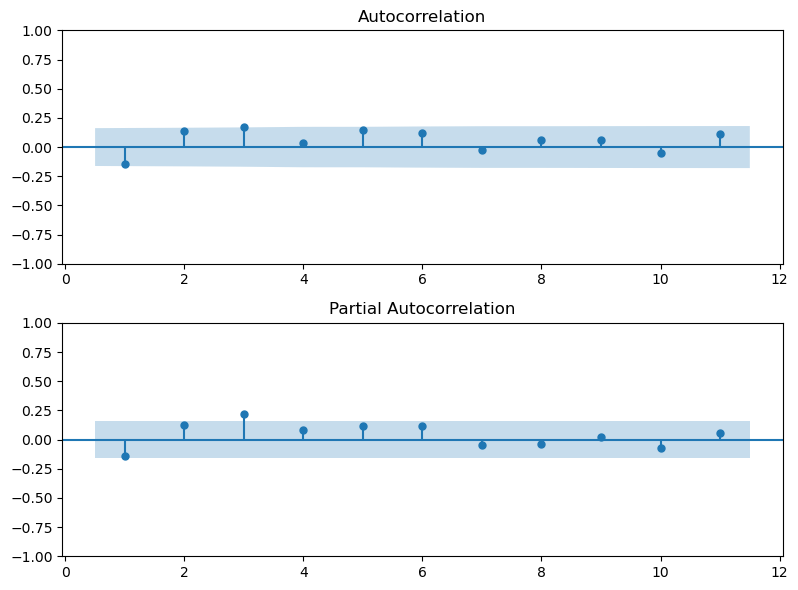

In [91]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# Take the first and seasonal differences and drop NaNs
aus_empl_diff = aus_empl.diff().diff(12).dropna()

# Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_empl_diff, lags = 11, zero = False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_empl_diff, lags = 11, zero= False, ax=ax2 )
plt.tight_layout()

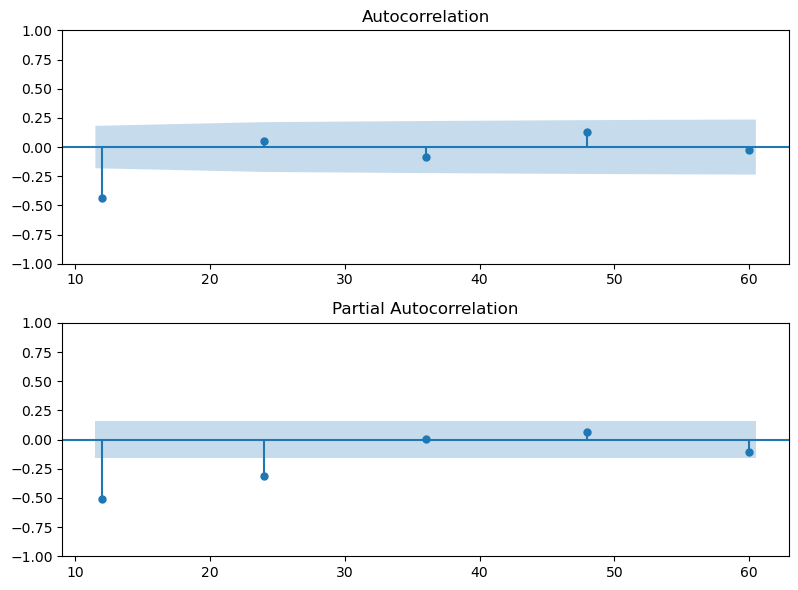

In [92]:
# Make list of lags
lags = [12,24,36,48,60]

# Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_empl_diff, lags = lags, zero = False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_empl_diff, lags = lags, zero= False, ax=ax2 )
plt.tight_layout()

The non-seasonal ACF doesn't show any of the usual patterns of MA, AR or ARMA models so we choose none of these. The Seaosnal ACF and PACF look like an MA(1) model.

## SARIMA vs ARIMA forecasts
In this exercise, you will see the effect of using a SARIMA model instead of an ARIMA model on your forecasts of seasonal time series.

Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1)12, have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC.

In the exercise you will use these two models to make dynamic future forecast for 25 months and plot these predictions alongside held out data for this period, wisconsin_test.

In [96]:
wis_test = pd.read_csv('Downloads/winscosins.csv', index_col = 0, parse_dates = True)
dates = wis_test.index
wis_test

,number_in_employment
date,
1973-01-10,374.5
1973-01-11,380.2
1973-01-12,384.6
1974-01-01,360.6
1974-01-02,354.4
1974-01-03,357.4
1974-01-04,367.0
1974-01-05,375.7
1974-01-06,381.0


In [99]:
model = SARIMAX(wis_test, order = (3,1,1), trend ='c', enforce_stationarity = True, enforce_invertibility = True)
arima_results = model.fit()
arima_results.specification

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'seasonal_periods': 0,
 'measurement_error': False,
 'time_varying_regression': False,
 'simple_differencing': False,
 'enforce_stationarity': True,
 'enforce_invertibility': True,
 'hamilton_representation': False,
 'concentrate_scale': False,
 'trend_offset': 1,
 'order': (3, 1, 1),
 'seasonal_order': (0, 0, 0, 0),
 'k_diff': 1,
 'k_seasonal_diff': 0,
 'k_ar': 3,
 'k_ma': 1,
 'k_seasonal_ar': 0,
 'k_seasonal_ma': 0,
 'k_ar_params': 3,
 'k_ma_params': 1,
 'trend': 'c',
 'k_trend': 1,
 'k_exog': 0,
 'mle_regression': False,
 'state_regression': False}

In [100]:
model = SARIMAX(wis_test, order = (0,1,1), seasonal_order = (1,1,1,12), trend ='c', enforce_stationarity = True, enforce_invertibility = True)
sarima_results = model.fit()
sarima_results.specification

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

{'seasonal_periods': 12,
 'measurement_error': False,
 'time_varying_regression': False,
 'simple_differencing': False,
 'enforce_stationarity': True,
 'enforce_invertibility': True,
 'hamilton_representation': False,
 'concentrate_scale': False,
 'trend_offset': 1,
 'order': (0, 1, 1),
 'seasonal_order': (1, 1, 1, 12),
 'k_diff': 1,
 'k_seasonal_diff': 1,
 'k_ar': 0,
 'k_ma': 1,
 'k_seasonal_ar': 12,
 'k_seasonal_ma': 12,
 'k_ar_params': 0,
 'k_ma_params': 1,
 'trend': 'c',
 'k_trend': 1,
 'k_exog': 0,
 'mle_regression': False,
 'state_regression': False}

In [ ]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wis_test, label='OBSERVED')
plt.legend()

# Automated model selection
The pmdarima package is a powerful tool to help you choose the model orders. You can use the information you already have from the identification step to narrow down the model orders which you choose by automation.

Remember, although automation is powerful, it can sometimes make mistakes that you wouldn't. It is hard to guess how the input data could be imperfect and affect the test scores.

In this exercise you will use the pmdarima package to automatically choose model orders for some time series datasets.

In [108]:
import pmdarima as pm

model1 = pm.auto_arima(df1, 
                     seasonal =True,
                     m=7, d=0, D=1,
                     max_p = 2, max_q = 2,
                     trace = True,
                     error_action = 'ignore',
                     suppress_warnings = True)

print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1124.433, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1120.434, Time=0.28 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1122.218, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1122.596, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1125.048, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1119.909, Time=0.47 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=1121.791, Time=0.46 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=1120.954, Time=0.39 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1119.066, Time=0.31 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=1119.294, Time=0.21 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=1120.813, Time=0.38 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=1120.054, Time=0.23 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=1119.937, Time=0.28 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : 

In [109]:
model2 = pm.auto_arima(df2, 
                      seasonal =False,
                      d =1, trand='c',
                      max_p = 2,max_q =2,
                      trace = True,
                      error_action = 'ignore',
                      suppress_warnings =True)

print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1131.956, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1153.963, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1155.355, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1155.747, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1152.602, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1136.103, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1130.992, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1149.020, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1132.526, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1129.276, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1147.864, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1130.891, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1130.243, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1154.093, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [110]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1,
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model3.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1593.897, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1583.263, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1593.659, Time=0.03 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=1581.972, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1575.886, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,1,1)[7] intercept   : AIC=1577.811, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,1,1)[7]          
Total fit time: 3.155 seconds
                                      SARIMAX Results                                      
Dep. Variable:            

## Saving and updating models
Once you have gone through the steps of the Box-Jenkins method and arrived at a model you are happy with, you will want to be able to save that model and also to incorporate new measurements when they are available. This is key part of putting the model into production.

In this exercise you will save a freshly trained model to disk, then reload it to update it with new data.

In [112]:
import joblib

# set model name
filename = 'candy_model.pkl'

# Pickle it
joblib.dump(model1, filename)

# Load the model back in
loaded_model = joblib.load(filename)

# SARIMA and Box-Jenkins
Box-Jenkins with seasonal data
 - Determine if time series is seasonal
 - Find seasonal period
 - Find transforms to make data stationary
   - Seasonal and non-seasonal differencing
   - Other transforms

## SARIMA model diagnostics
Usually the next step would be to find the order of differencing and other model orders. However, this time it's already been done for you. The time series is best fit by a 
 model with an added constant.

In this exercise you will make sure that this is a good model by first fitting it using the SARIMAX class and going through the normal model diagnostics procedure.

In [119]:
co2 = pd.read_csv('Downloads/co2.csv', index_col = 0, parse_dates = True)
co2 = co2.asfreq('MS')
co2.head()

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


In [120]:
model = SARIMAX(co2, order = (1,1,1), seasonal_order = (0,1,1,12), trend='c')
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Wed, 20 Sep 2023   AIC                            369.437
Time:                                    15:51:47   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.808      0.005       0.001       0.003
ar.L1          0.2414      0.078   

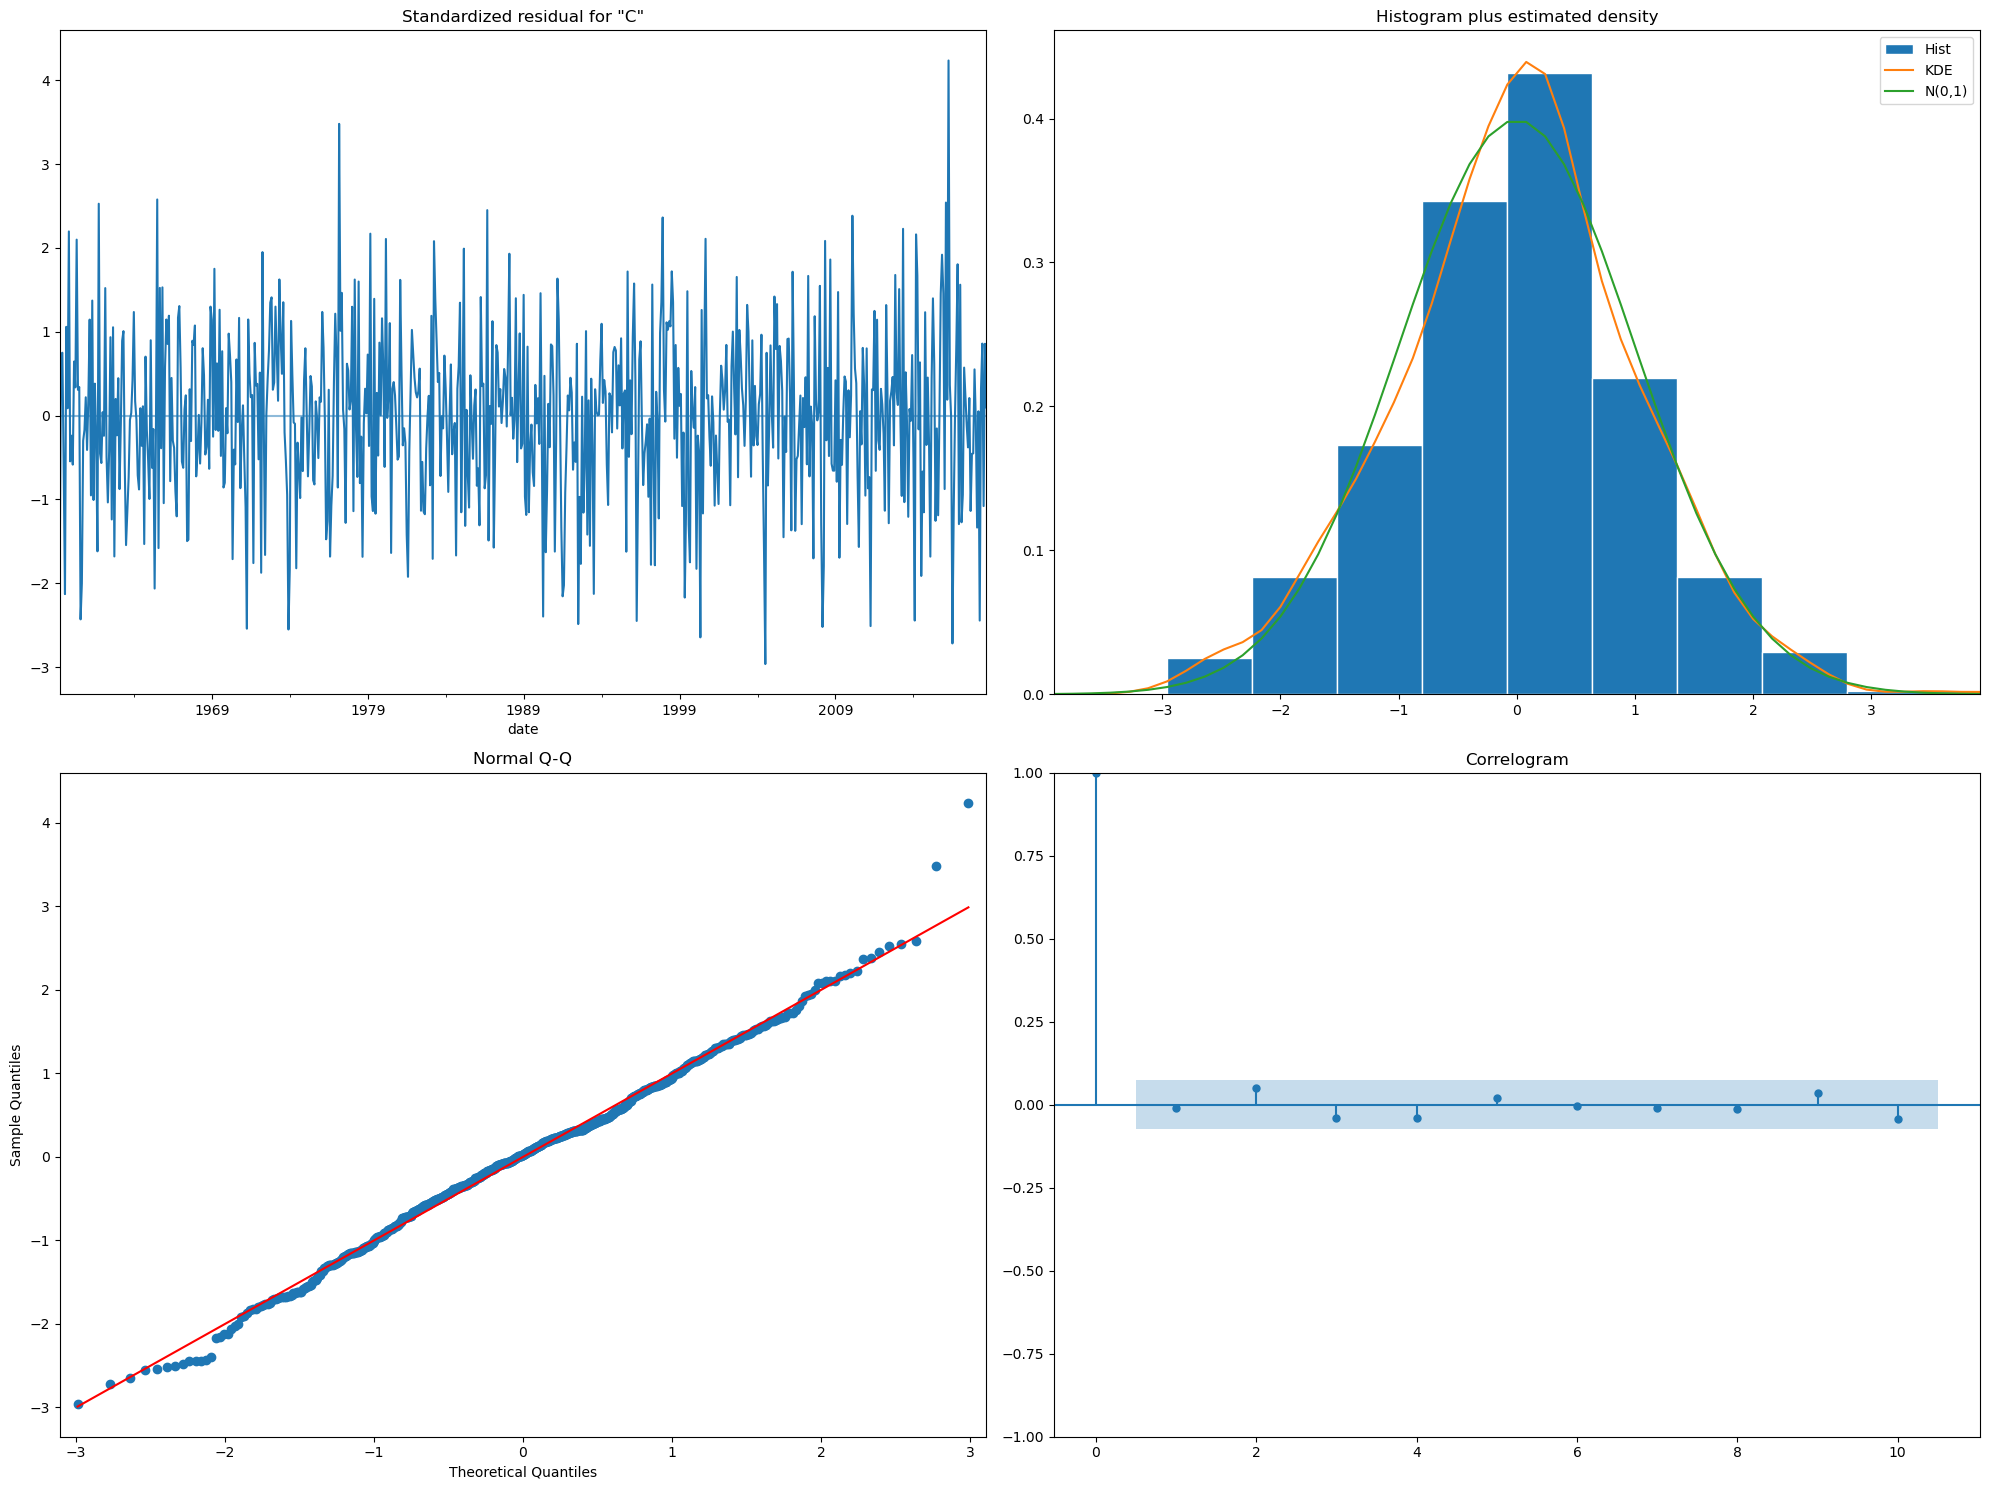

In [121]:
# Plot common diagnostics
results.plot_diagnostics(figsize=(20,15))
plt.tight_layout()

## SARIMA forecast
In the previous exercise you confirmed that a SARIMA (1,1,1) x (0,1,1)12 model was a good fit to the CO2 time series by using diagnostic checking.

Now its time to put this model into practice to make future forecasts. Climate scientists tell us that we have until 2030 to drastically reduce our CO2 emissions or we will face major societal challenges.

In this exercise, you will forecast the CO2 time series up to the year 2030 to find the CO2 levels if we continue emitting as usual.

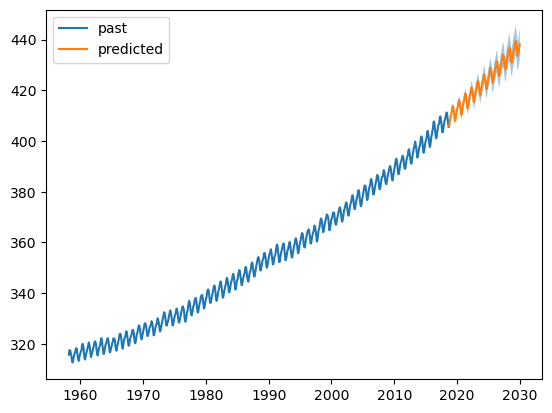

In [123]:
# Create forecast object
forecast_object = results.get_forecast(136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label = 'past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.loc[:, 'lower CO2_ppm'], 
                 conf_int.loc[:, 'upper CO2_ppm'], alpha=0.4)

plt.legend()

In [124]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

438.1992421277654
lower CO2_ppm    432.116327
upper CO2_ppm    444.282157
Name: 2030-01-01 00:00:00, dtype: float64
